In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv('./young-people-survey/responses.csv')
dataset.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock           ...             Age  \
0      1.0  5.0   5.0                1.0           ...            20.0   
1      2.0  3.0   5.0                4.0           ...            19.0   
2      5.0  3.0   5.0                3.0           ...            20.0   
3      1.0  2.0   2.0                1.0           ...            22.0   
4      3.0  5.0   3.0                1.0           ...            20.0   

   Height  Weight  Number of siblings  Gender  Left - right handed  \
0   163.0    48.0                 1.0  female         right handed   
1   163.0    58.0                 2.0  female         right handed   
2   176.0    67.0                 2.0  female         right handed   
3   172.0    59.0                 1.0  female         right handed   
4   170.0    59.0                 1.0  female         right handed   

                 Education  Only child  Village - town  House - block of flats  
0  college/bachelor degree          no         village          block of flats  
1  college/bachelor degree          no            city          block of flats  
2         secondary school          no            city          block of flats  
3  college/bachelor degree         yes            city          house/bungalow  
4         secondary school          no         village          house/bungalow  

[5 rows x 150 columns]

In [4]:
print("values for Smoking:")
print(dataset.Smoking.unique())
print("values for Alcohol:")
print(dataset.Alcohol.unique())
print("values for Punctuality:")
print(dataset.Punctuality.unique())
print("values for Lying:")
print(dataset.Lying.unique())
print("values for Internet usage:")
print(dataset['Internet usage'].unique())
print("values for Gender:")
print(dataset.Gender.unique())
print("values for Education:")
print(dataset.Education.unique())
print("values for Only child:")
print(dataset['Only child'].unique())
print("values for left - right handed:")
print(dataset['Left - right handed'].unique())
print("values for Village - town:")
print(dataset['Village - town'].unique())
print("values for House - block of flats:")
print(dataset['House - block of flats'].unique())

values for Smoking:
['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan]
values for Alcohol:
['drink a lot' 'social drinker' 'never' nan]
values for Punctuality:
['i am always on time' 'i am often early' 'i am often running late' nan]
values for Lying:
['never' 'sometimes' 'only to avoid hurting someone'
 'everytime it suits me' nan]
values for Internet usage:
['few hours a day' 'most of the day' 'less than an hour a day'
 'no time at all']
values for Gender:
['female' 'male' nan]
values for Education:
['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
values for Only child:
['no' 'yes' nan]
values for left - right handed:
['right handed' 'left handed' nan]
values for Village - town:
['village' 'city' nan]
values for House - block of flats:
['block of flats' 'house/bungalow' nan]


## Feature exploration

Let's see if, considering features with strings value, they have very rare values that we can merge together, or let's see how the age values are distributed and if it makes sense to encode them in a certain way.

In [5]:
pd.value_counts(dataset.Smoking)

tried smoking     430
never smoked      208
current smoker    189
former smoker     175
Name: Smoking, dtype: int64

In [6]:
pd.value_counts(dataset.Alcohol)

social drinker    659
drink a lot       222
never             124
Name: Alcohol, dtype: int64

In [7]:
pd.value_counts(dataset.Lying)

sometimes                        549
only to avoid hurting someone    270
everytime it suits me            138
never                             51
Name: Lying, dtype: int64

In [8]:
pd.value_counts(dataset.Punctuality)

i am always on time        399
i am often early           327
i am often running late    282
Name: Punctuality, dtype: int64

In [9]:
pd.value_counts(dataset.Education)

secondary school                    621
college/bachelor degree             212
masters degree                       81
primary school                       80
currently a primary school pupil     10
doctorate degree                      5
Name: Education, dtype: int64

given this, we can merge doctorate degree with masters and currently a primary school pupil with primary school

In [10]:
pd.value_counts(dataset['Internet usage'])

few hours a day            744
less than an hour a day    139
most of the day            124
no time at all               3
Name: Internet usage, dtype: int64

we can merge no time at all with less than one hour

In [11]:
pd.value_counts(dataset.Age)

19.0    210
20.0    194
21.0    127
18.0    123
22.0     84
17.0     53
23.0     47
25.0     30
16.0     29
24.0     28
28.0     17
26.0     15
27.0     14
29.0     11
15.0     11
30.0     10
Name: Age, dtype: int64

As we can see from Ages values, is not possible to have someone that is currently a primary school pupil, can this is an error?

In [12]:
pd.value_counts(dataset.Weight)

60.0     76
55.0     62
70.0     51
80.0     50
65.0     49
75.0     41
50.0     41
58.0     31
57.0     31
53.0     28
63.0     28
62.0     26
54.0     25
52.0     23
68.0     23
56.0     22
48.0     21
85.0     20
78.0     19
67.0     18
64.0     18
90.0     17
72.0     16
83.0     15
76.0     15
77.0     15
51.0     14
49.0     13
74.0     12
73.0     11
         ..
61.0      7
79.0      6
95.0      5
45.0      5
92.0      5
89.0      5
46.0      5
86.0      4
120.0     3
96.0      3
44.0      3
87.0      3
98.0      3
93.0      3
100.0     3
91.0      2
97.0      2
43.0      2
113.0     1
99.0      1
125.0     1
150.0     1
111.0     1
42.0      1
110.0     1
105.0     1
101.0     1
41.0      1
103.0     1
165.0     1
Name: Weight, Length: 69, dtype: int64

In [13]:
pd.value_counts(dataset.Height)

170.0    86
168.0    62
175.0    56
180.0    55
165.0    54
185.0    43
178.0    43
173.0    41
172.0    38
163.0    34
167.0    29
160.0    28
183.0    24
171.0    23
164.0    23
176.0    22
182.0    22
162.0    20
169.0    19
187.0    19
184.0    19
174.0    19
177.0    18
166.0    18
190.0    17
186.0    16
189.0    15
158.0    15
188.0    13
179.0    13
161.0    10
192.0     9
181.0     9
157.0     9
193.0     8
156.0     5
159.0     5
155.0     5
195.0     4
194.0     4
153.0     3
200.0     3
154.0     3
191.0     2
197.0     2
203.0     2
148.0     1
152.0     1
62.0      1
Name: Height, dtype: int64

In [14]:
def convertSmoking(value):
    if(value=='never smoked'):
        return 1
    elif(value=='tried smoking'):
        return 2
    elif(value == 'former smoker'):
        return 3 
    elif(value=='current smoker'):
        return 4

def convertAlcohol(value):
    if(value=='never'):
        return 1
    elif(value=='social drinker'):
        return 2
    elif(value == 'drink a lot'):
        return 3 
    
def convertPunctuality(value):
    if(value=='i am often running late'):
        return 1
    elif(value=='i am often early'):
        return 2
    elif(value == 'i am always on time'):
        return 3 

def convertLying(value):
    if(value=='never'):
        return 1
    elif(value=='sometimes'):
        return 2
    elif(value == 'only to avoid hurting someone'):
        return 3 
    elif(value == 'everytime it suits me'):
        return 4

def convertInternetUsage(value):
    if(value=='few hours a day'):
        return 2
    elif(value=='less than an hour a day'):
        return 1
    elif(value == 'most of the day'):
        return 3 
    elif(value == 'no time at all'):
        return 1

def convertEducation(value):
    if(value=='currently a primary school pupil'):
        return 1
    elif(value=='primary school'):
        return 1
    elif(value == 'secondary school'):
        return 2
    elif(value == 'college/bachelor degree'):
        return 3
    elif(value == 'masters degree'):
        return 4
    elif(value == 'doctorate degree'):
        return 5

In [15]:
dataset['Smoking'] = dataset.Smoking.apply(convertSmoking)
dataset['Alcohol'] = dataset.Alcohol.apply(convertAlcohol)
dataset['Lying'] = dataset.Lying.apply(convertLying)
dataset['Punctuality'] = dataset.Punctuality.apply(convertPunctuality)
dataset['Education'] = dataset.Education.apply(convertEducation)
dataset['Internet usage'] = dataset['Internet usage'].apply(convertInternetUsage)

In [16]:
def GenderConversion(value):
    if value=='male':
        return 1
    elif value == 'female':
        return 0

def OnlyChildConversion(value):
    if value=='yes':
        return 1
    elif value == 'no':
        return 0
    
def LRHandedConversion(value):
    if value=='right handed':
        return 0
    elif value == 'left handed':
        return 1

def VillageTownConversion(value):
    if value=='city':
        return 0
    elif value == 'village':
        return 1

def HouseBoFlatsConversion(value):
    if value=='house/bungalow':
        return 1
    elif value == 'block of flats':
        return 0

def Range1_5ValuesConversion(value):
    if value==4 or value==5:
        return 1
    elif value == 1 or value == 2 or value == 3:
        return 0

In [17]:
dataset['Gender'] = dataset['Gender'].apply(GenderConversion)
dataset['Only child'] = dataset['Only child'].apply(OnlyChildConversion)
dataset['Left - right handed'] = dataset['Left - right handed'].apply(LRHandedConversion)
dataset['Village - town'] = dataset['Village - town'].apply(VillageTownConversion)
dataset['House - block of flats'] = dataset['House - block of flats'].apply(HouseBoFlatsConversion)
#for f in numerical:
#    if f!='Age' and f!='Number of siblings' and f!='Weight' and f!='Height':
#        dataset[f] = dataset[f].apply(Range1_5ValuesConversion)
dataset['Empathy'] = dataset['Empathy'].apply(Range1_5ValuesConversion)

# Missing values analysis

In [18]:
df_na = (dataset.isnull().sum() / len(dataset)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': df_na})
missing_data

Missing Ratio
Height                               1.980198
Weight                               1.980198
Passive sport                        1.485149
Chemistry                            0.990099
Geography                            0.891089
Latino                               0.792079
Smoking                              0.792079
Documentary                          0.792079
Punk                                 0.792079
Theatre                              0.792079
Age                                  0.693069
Gardening                            0.693069
Alternative                          0.693069
Rock n roll                          0.693069
Criminal damage                      0.693069
Countryside, outdoors                0.693069
Daily events                         0.693069
Classical music                      0.693069
Techno, Trance                       0.693069
Reggae, Ska                          0.693069
Final judgement                      0.693069
Compassion to animals                0.693069
Reading                              0.594059
Giving                               0.594059
Friends versus money                 0.594059
Responding to a serious letter       0.594059
Movies                               0.594059
PC                                   0.594059
Biology                              0.594059
Science and technology               0.594059

In [19]:
dataset = dataset.apply(lambda x: x.fillna(x.median()),axis=0)

In [20]:
dataset.isnull().values.any()

False

In [21]:
dataset.to_csv("preprocessedDataset2.csv")

Let's now explore the feature correlation in the dataset

In [22]:
d=dataset.assign(C=dataset.Empathy.astype('category').cat.codes).corr()

In [23]:
d['C']

Music                         0.101486
Slow songs or fast songs     -0.071887
Dance                         0.050916
Folk                          0.095237
Country                       0.046362
Classical music               0.037262
Musical                       0.106852
Pop                           0.059472
Rock                          0.068388
Metal or Hardrock            -0.005298
Punk                          0.007828
Hiphop, Rap                  -0.070686
Reggae, Ska                   0.057564
Swing, Jazz                   0.115098
Rock n roll                   0.091467
Alternative                   0.079784
Latino                        0.175616
Techno, Trance                0.008665
Opera                         0.034477
Movies                        0.028381
Horror                       -0.040178
Thriller                     -0.030434
Comedy                        0.103998
Romantic                      0.117947
Sci-fi                       -0.012194
War                      

In [56]:
plt.rcParams['figure.figsize'] = [150.0,150.0]
plt.rcParams['figure.dpi']=70
covariance=dataset.corr(method='pearson')
sns.set(font_scale=4)
sns.heatmap(covariance,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

As we can see in the correlation plot, features are quite uncorrelated, with few exceptions such as 'shopping' and 'finances'that seem to be strongly correlated. 
On the other hand, what we may notice is that there are groups of features that seems to be correlated, in particular, if you have a deeper look, it seems that these kind of groups are also semantically correlated in fact we can highlight some areas: Music, Movies, Interests,Fears, and Personal attitudes, Spending.
what we can do right now is selecting this groups and performing PCA over them, to look for the main directions along with the most part of information in groups is, in order to try to reduce the number of features.

In [57]:
music = dataset.iloc[:,0:19] 
movies = dataset.iloc[:,19:31] 
fears = dataset.iloc[:,63:73] 
interests = dataset.iloc[:,31:63] 
personal = dataset.iloc[:, 76:133] 
spending = dataset.iloc[:,133:140]


In [58]:
other = pd.concat([dataset.iloc[:,73:76],dataset.iloc[:,139:150]],axis=1)

In [59]:
other.head()

Smoking  Alcohol  Healthy eating  Spending on healthy eating   Age  Height  \
0      1.0      3.0             4.0                         3.0  20.0   163.0   
1      1.0      3.0             3.0                         2.0  19.0   163.0   
2      2.0      3.0             3.0                         2.0  20.0   176.0   
3      3.0      3.0             3.0                         1.0  22.0   172.0   
4      2.0      2.0             4.0                         4.0  20.0   170.0   

   Weight  Number of siblings  Gender  Left - right handed  Education  \
0    48.0                 1.0     0.0                  0.0        3.0   
1    58.0                 2.0     0.0                  0.0        3.0   
2    67.0                 2.0     0.0                  0.0        2.0   
3    59.0                 1.0     0.0                  0.0        3.0   
4    59.0                 1.0     0.0                  0.0        2.0   

   Only child  Village - town  House - block of flats  
0         0.0             1.0                     0.0  
1         0.0             0.0                     0.0  
2         0.0             0.0                     0.0  
3         1.0             0.0                     1.0  
4         0.0             1.0                     1.0

In [60]:
other.shape

(1010, 14)

In [61]:
covarianceMusic=music.corr(method='pearson')
covarianceMovies=movies.corr(method='pearson')
covarianceFears=fears.corr(method='pearson')
covarianceInterests=interests.corr(method='pearson')
covariancePersonal=personal.corr(method='pearson')
covarianceSpending=spending.corr(method='pearson')

In [62]:
sns.set(font_scale=10)
plt.rcParams['figure.dpi']=20

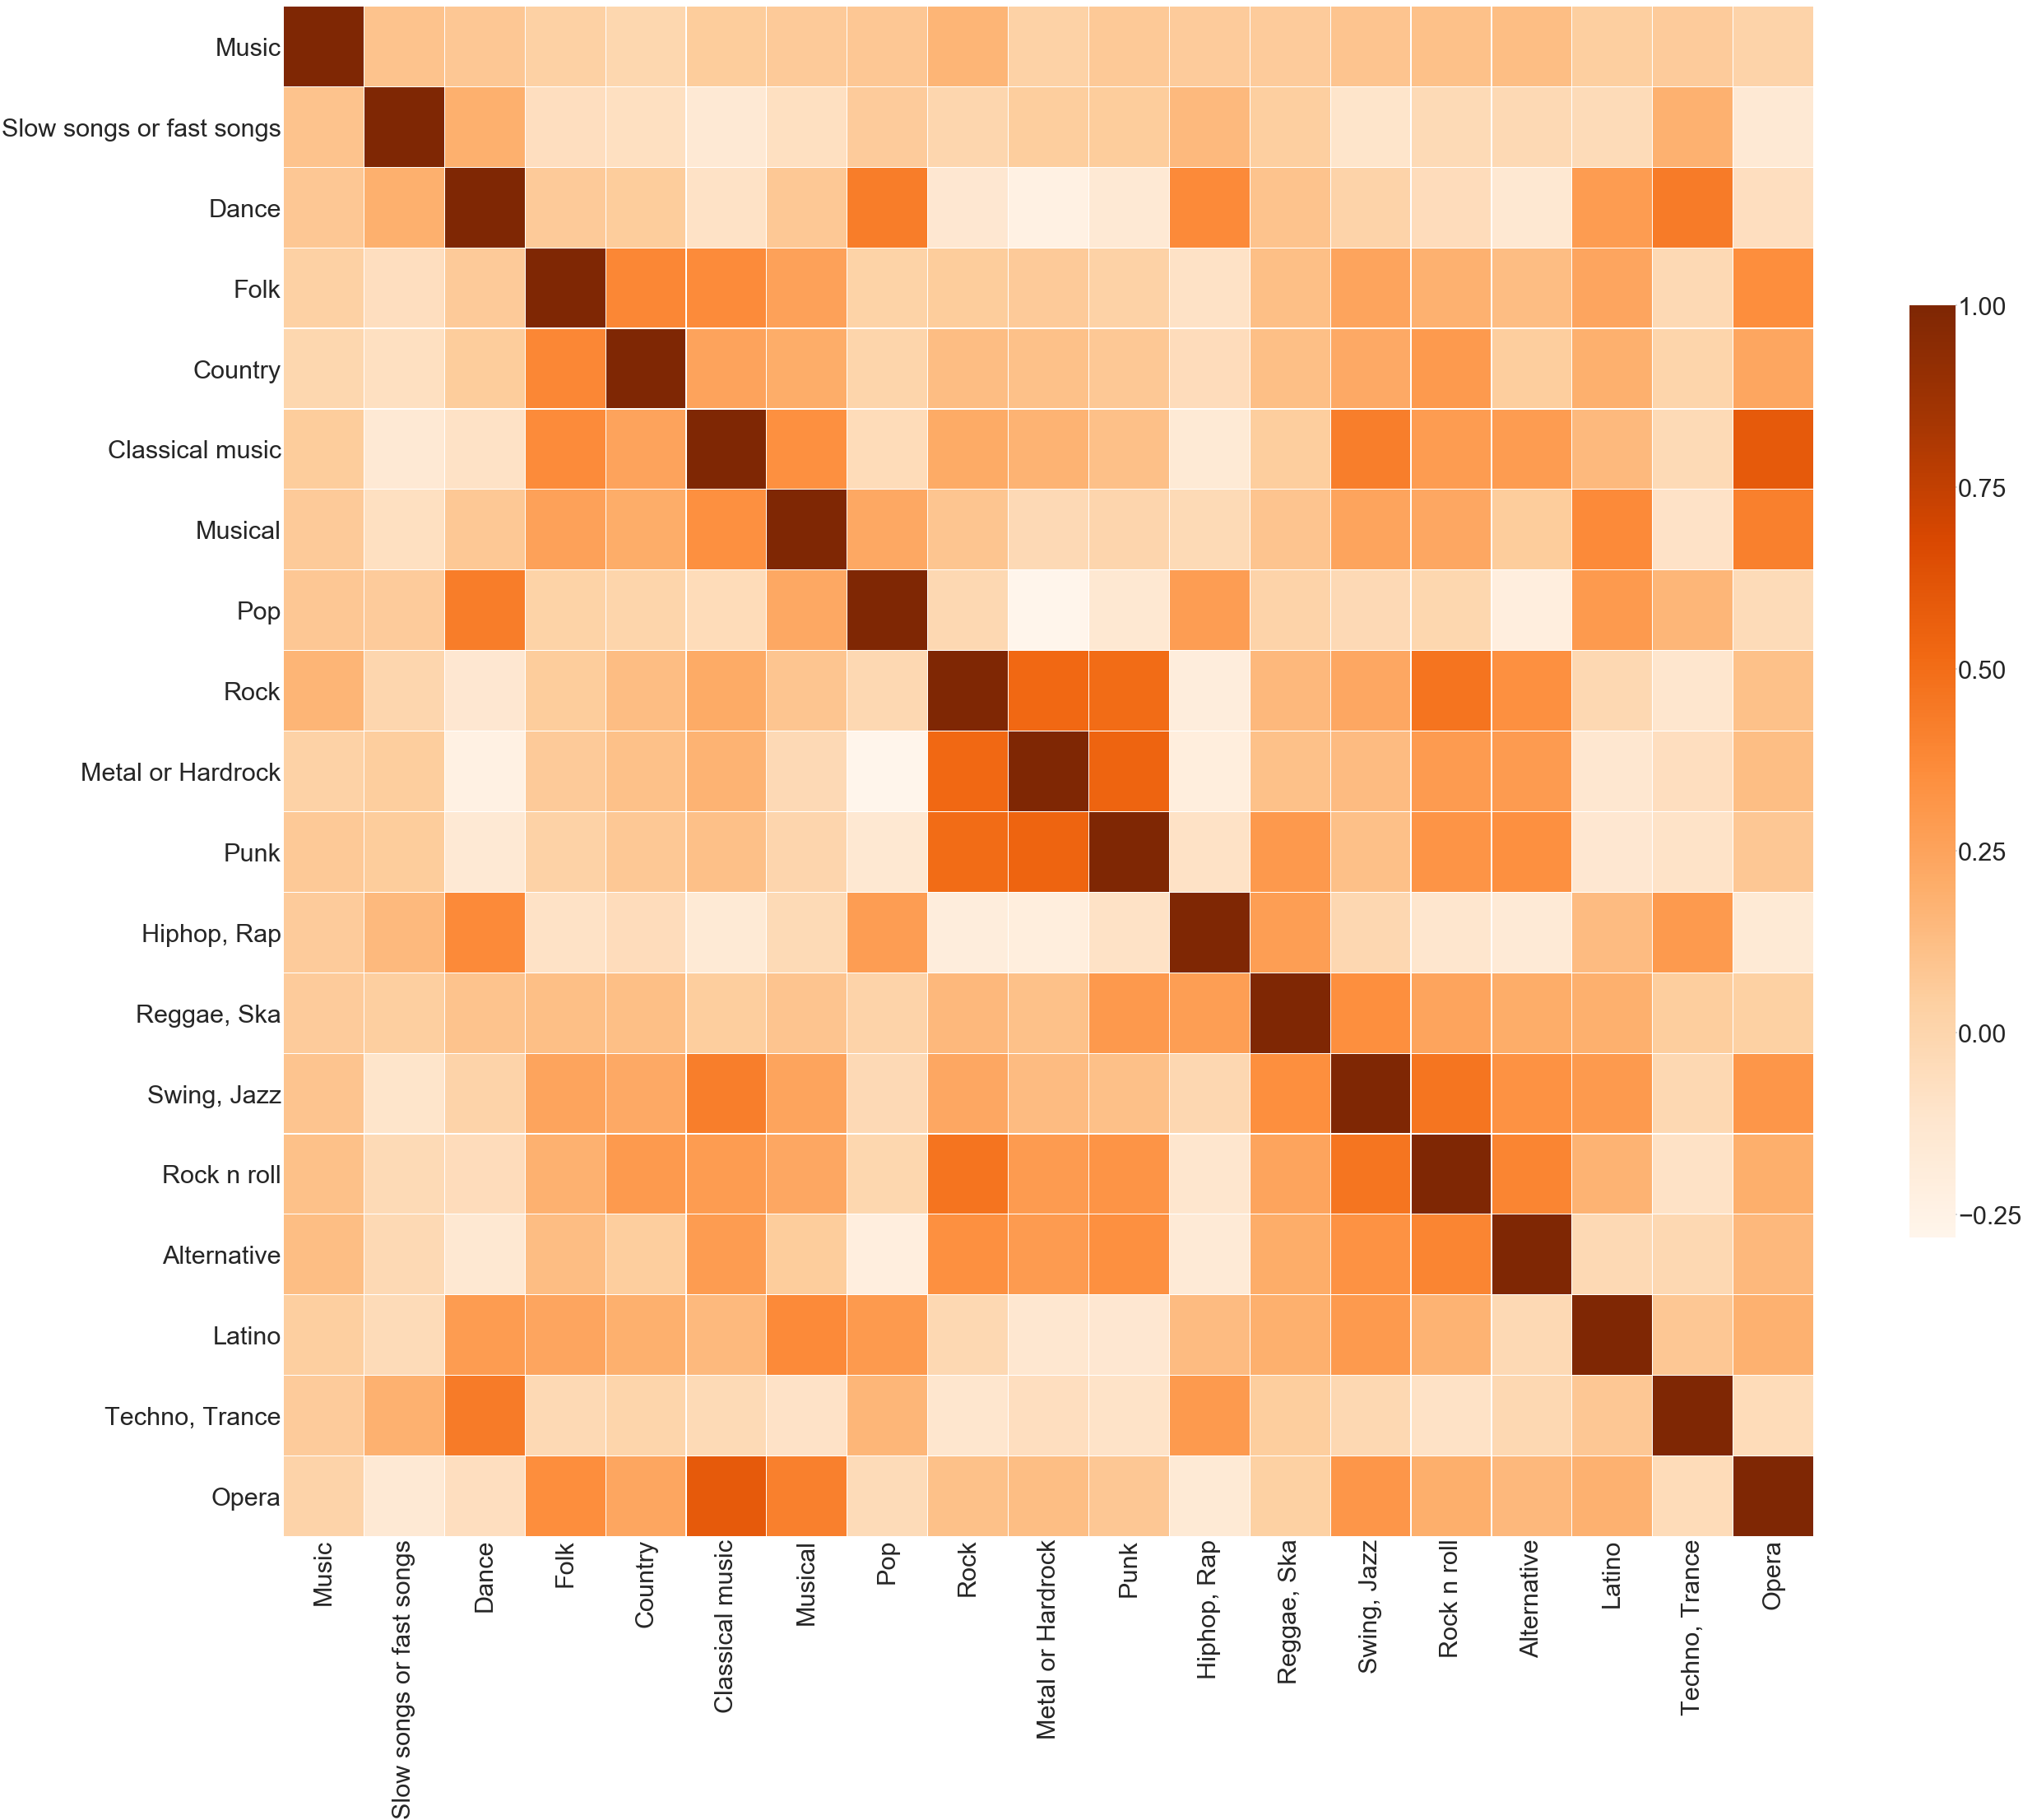

In [63]:
sns.heatmap(covarianceMusic,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [64]:
from sklearn.decomposition import PCA

n_components=12
p_list = ['pMusic'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(music)
musicPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.21460208 0.15134284 0.10636859 0.06351941 0.05980338 0.05151406
 0.04619852 0.03879059 0.03724805 0.03140791 0.03099139 0.0263875 ]


array([21.46, 36.59, 47.23, 53.58, 59.56, 64.71, 69.33, 73.21, 76.93,
       80.07, 83.17, 85.81])

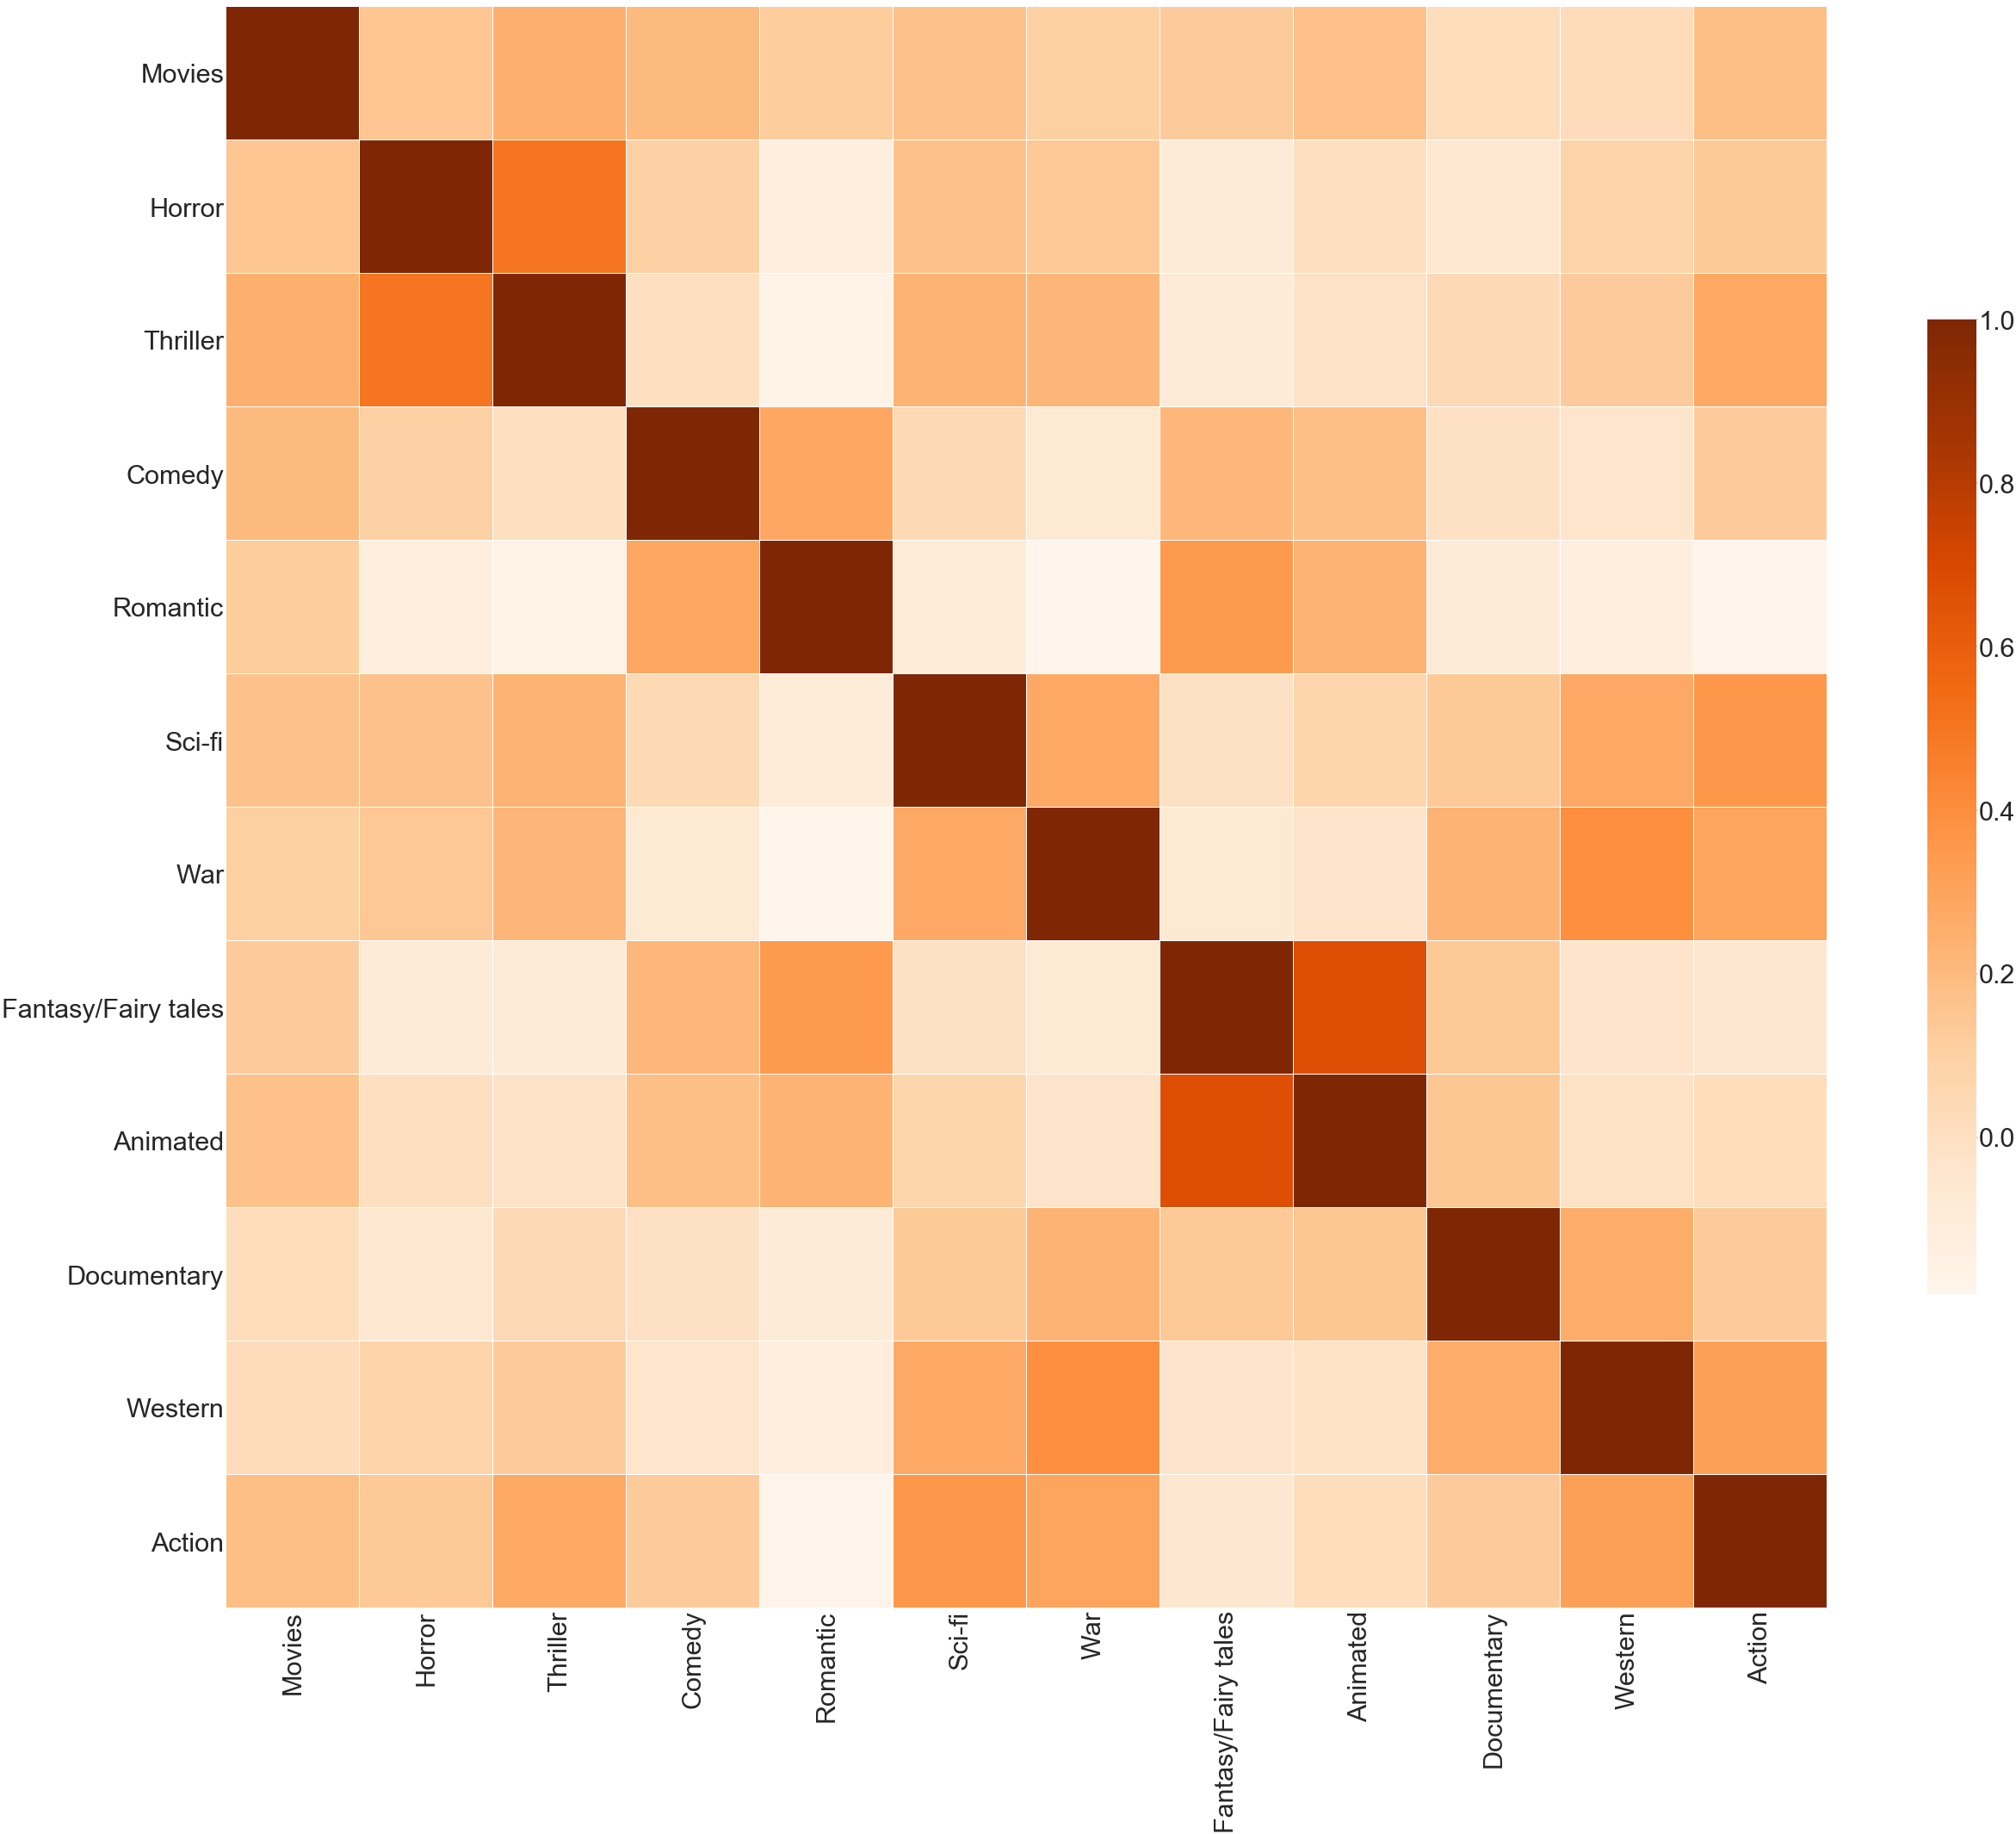

In [65]:
sns.heatmap(covarianceMovies,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [66]:
from sklearn.decomposition import PCA

n_components=8
p_list = ['pMovies'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(movies)
moviesPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.24133568 0.16858582 0.13431775 0.08436243 0.07149047 0.063912
 0.05941609 0.05314769]


array([24.13, 40.99, 54.42, 62.86, 70.01, 76.4 , 82.34, 87.65])

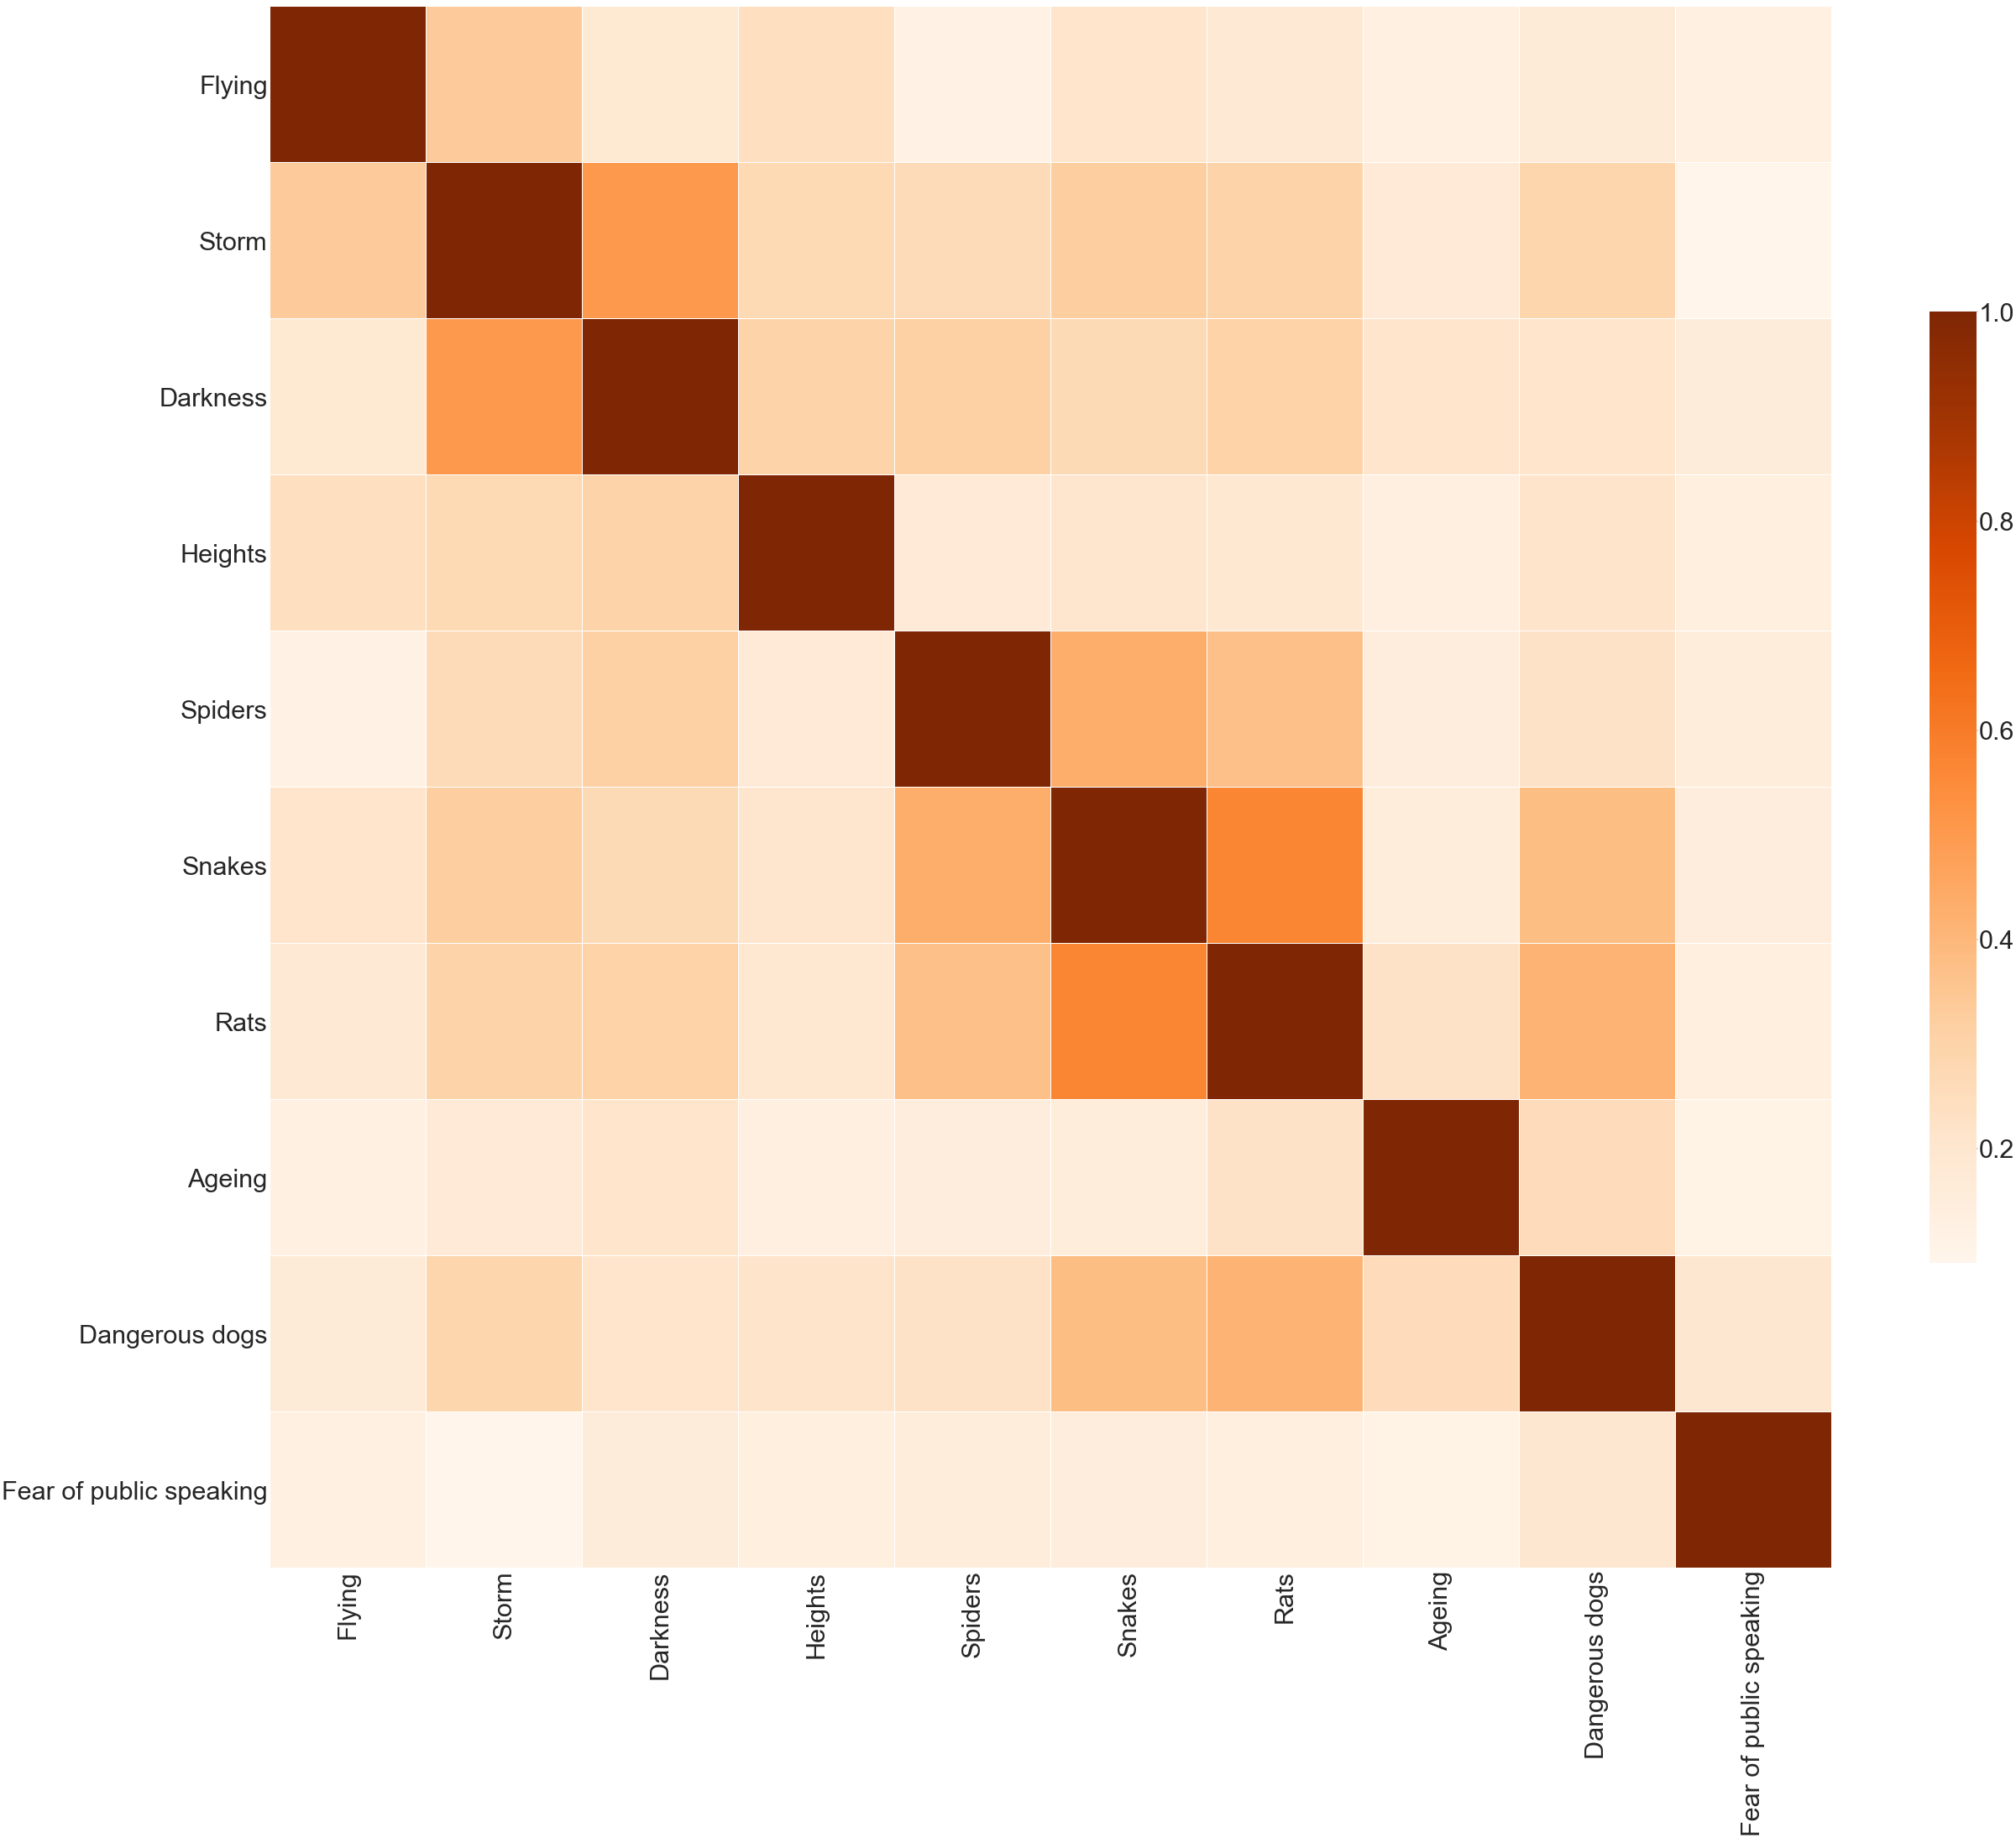

In [67]:
sns.heatmap(covarianceFears,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [68]:
from sklearn.decomposition import PCA

n_components=7
p_list = ['pFears'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(fears)
fearsPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.3382968  0.11310796 0.09906024 0.08977009 0.07921912 0.0682228
 0.06707   ]


array([33.83, 45.14, 55.05, 64.03, 71.95, 78.77, 85.48])

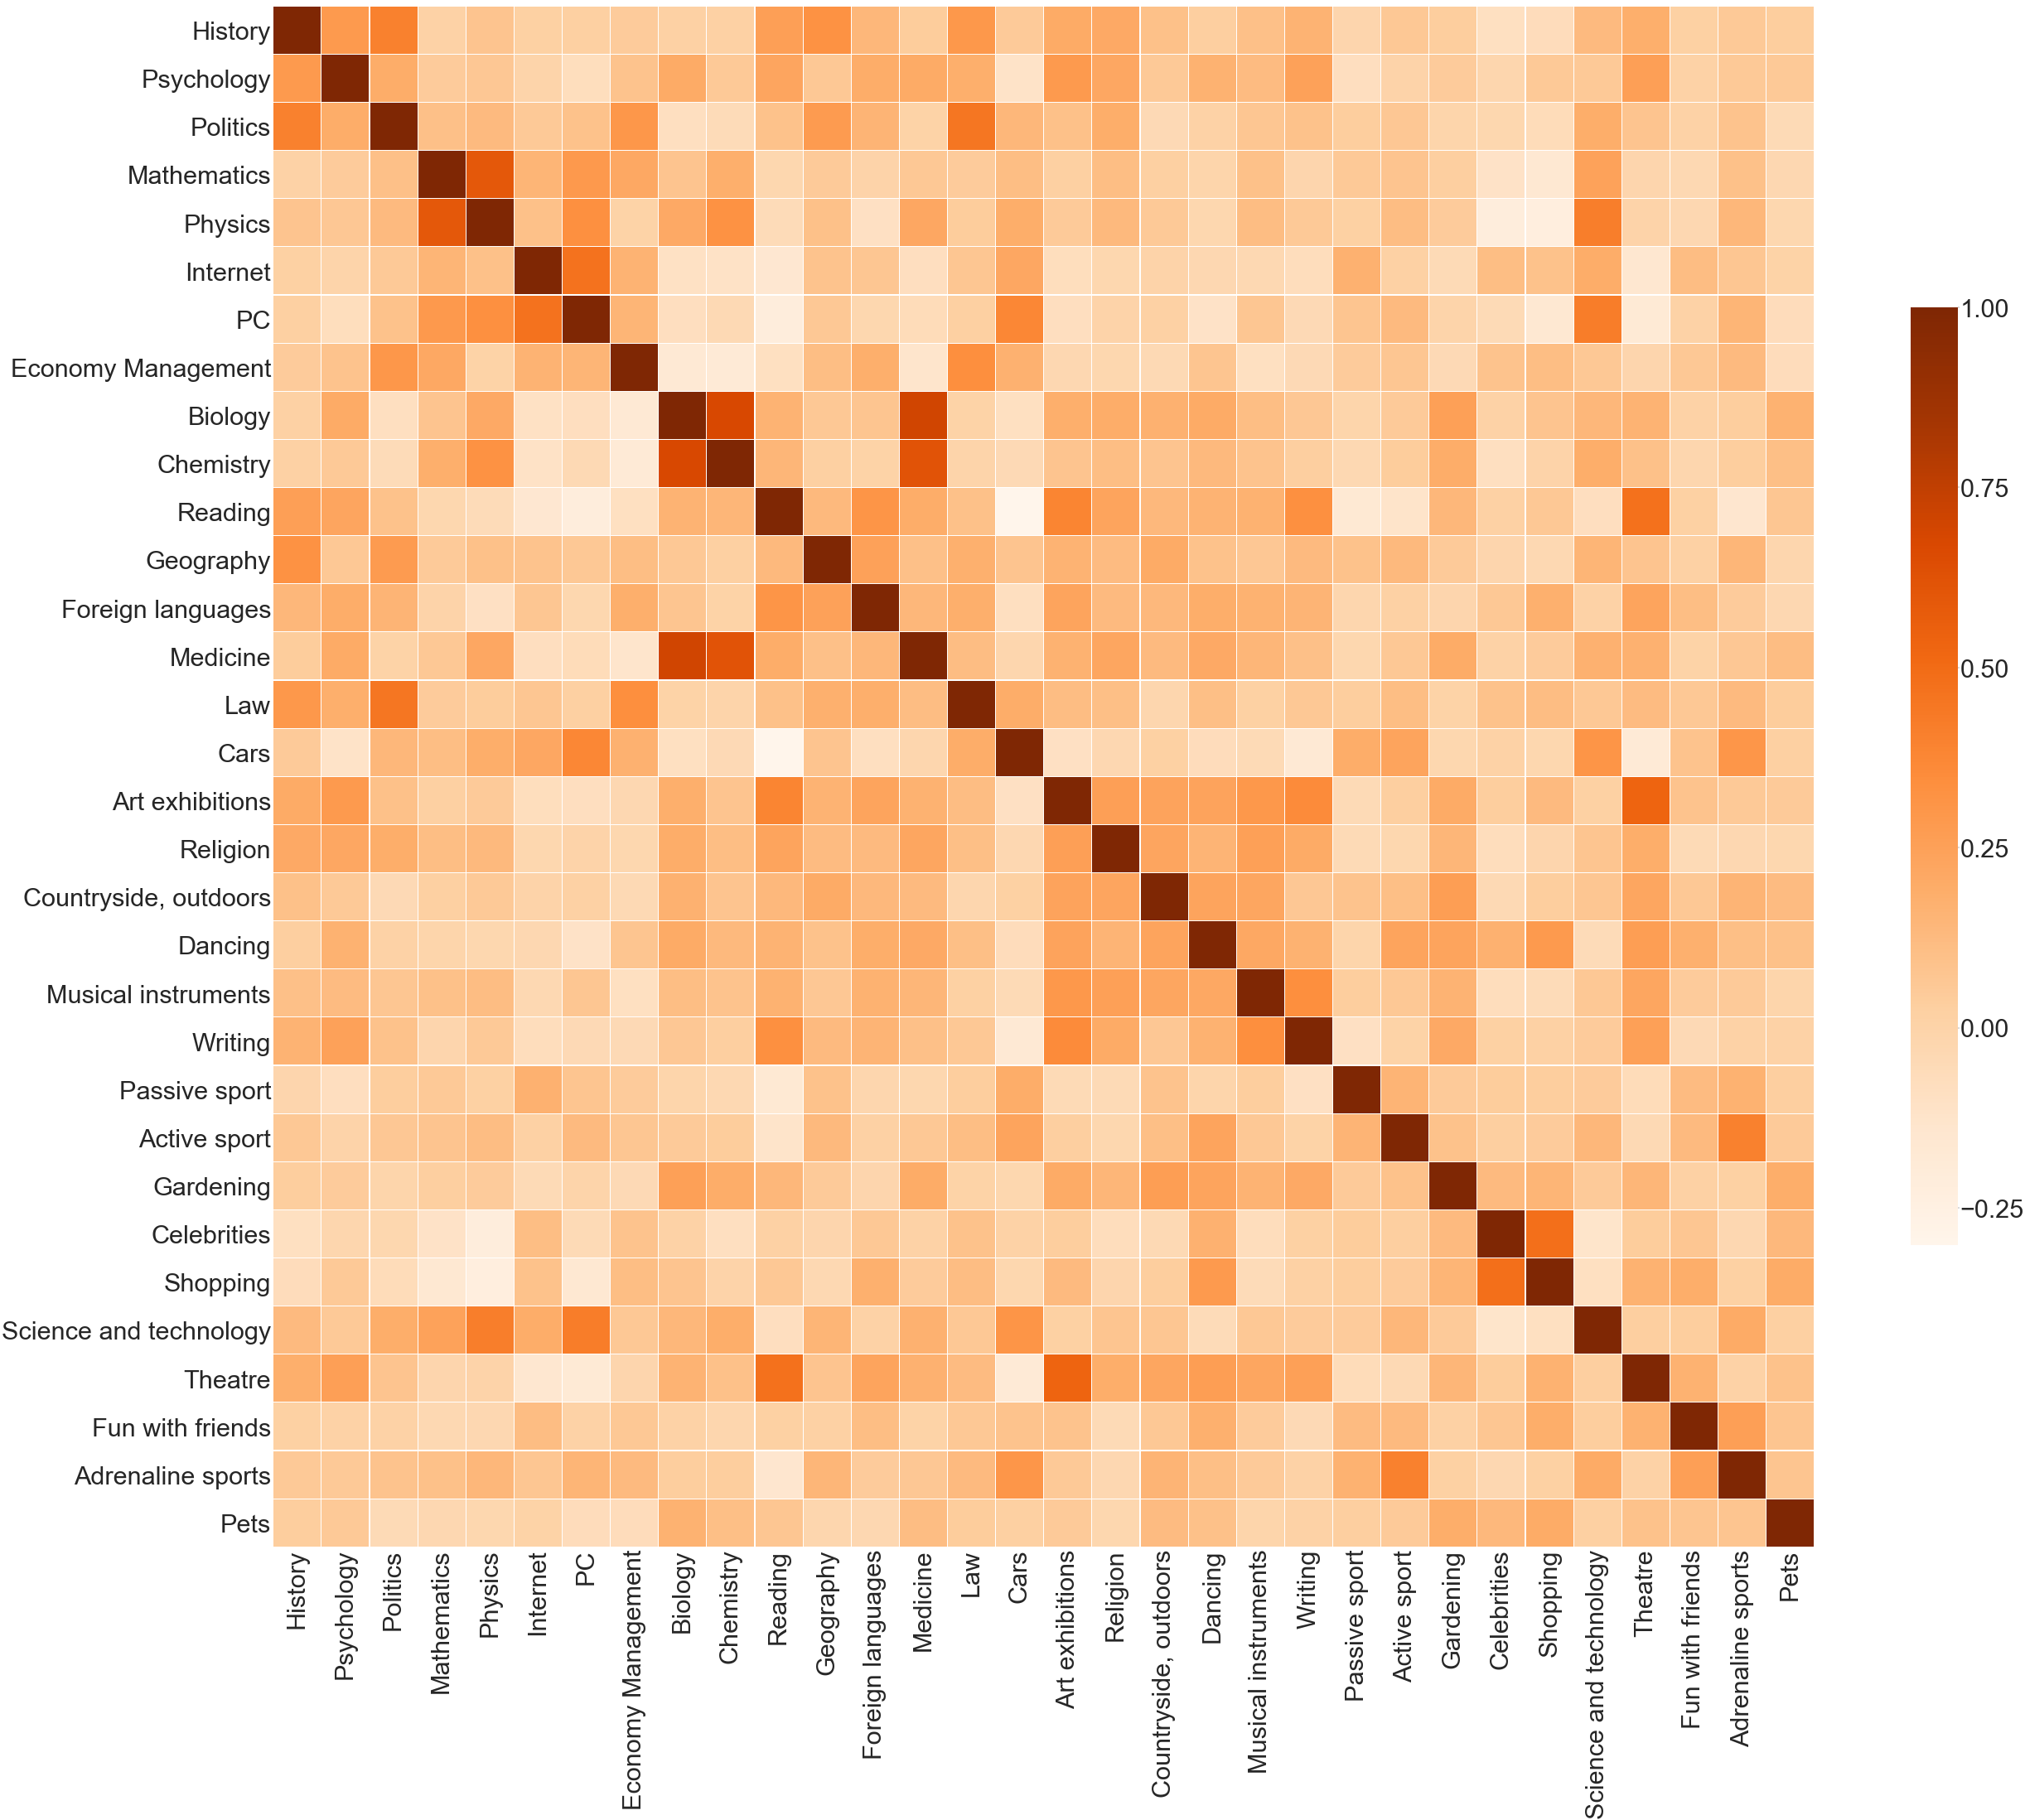

In [69]:
sns.heatmap(covarianceInterests,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [70]:
from sklearn.decomposition import PCA

n_components=20
p_list = ['pInterests'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(interests)
interestsPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.13658878 0.10313325 0.07965417 0.07053087 0.05157888 0.04212347
 0.04114566 0.03561661 0.03238831 0.03164941 0.02914327 0.02788171
 0.02622599 0.02503057 0.02308897 0.02225455 0.02103248 0.01963248
 0.0191778  0.01870378]


array([13.66, 23.97, 31.94, 38.99, 44.15, 48.36, 52.47, 56.03, 59.27,
       62.43, 65.34, 68.13, 70.75, 73.25, 75.56, 77.79, 79.89, 81.85,
       83.77, 85.64])

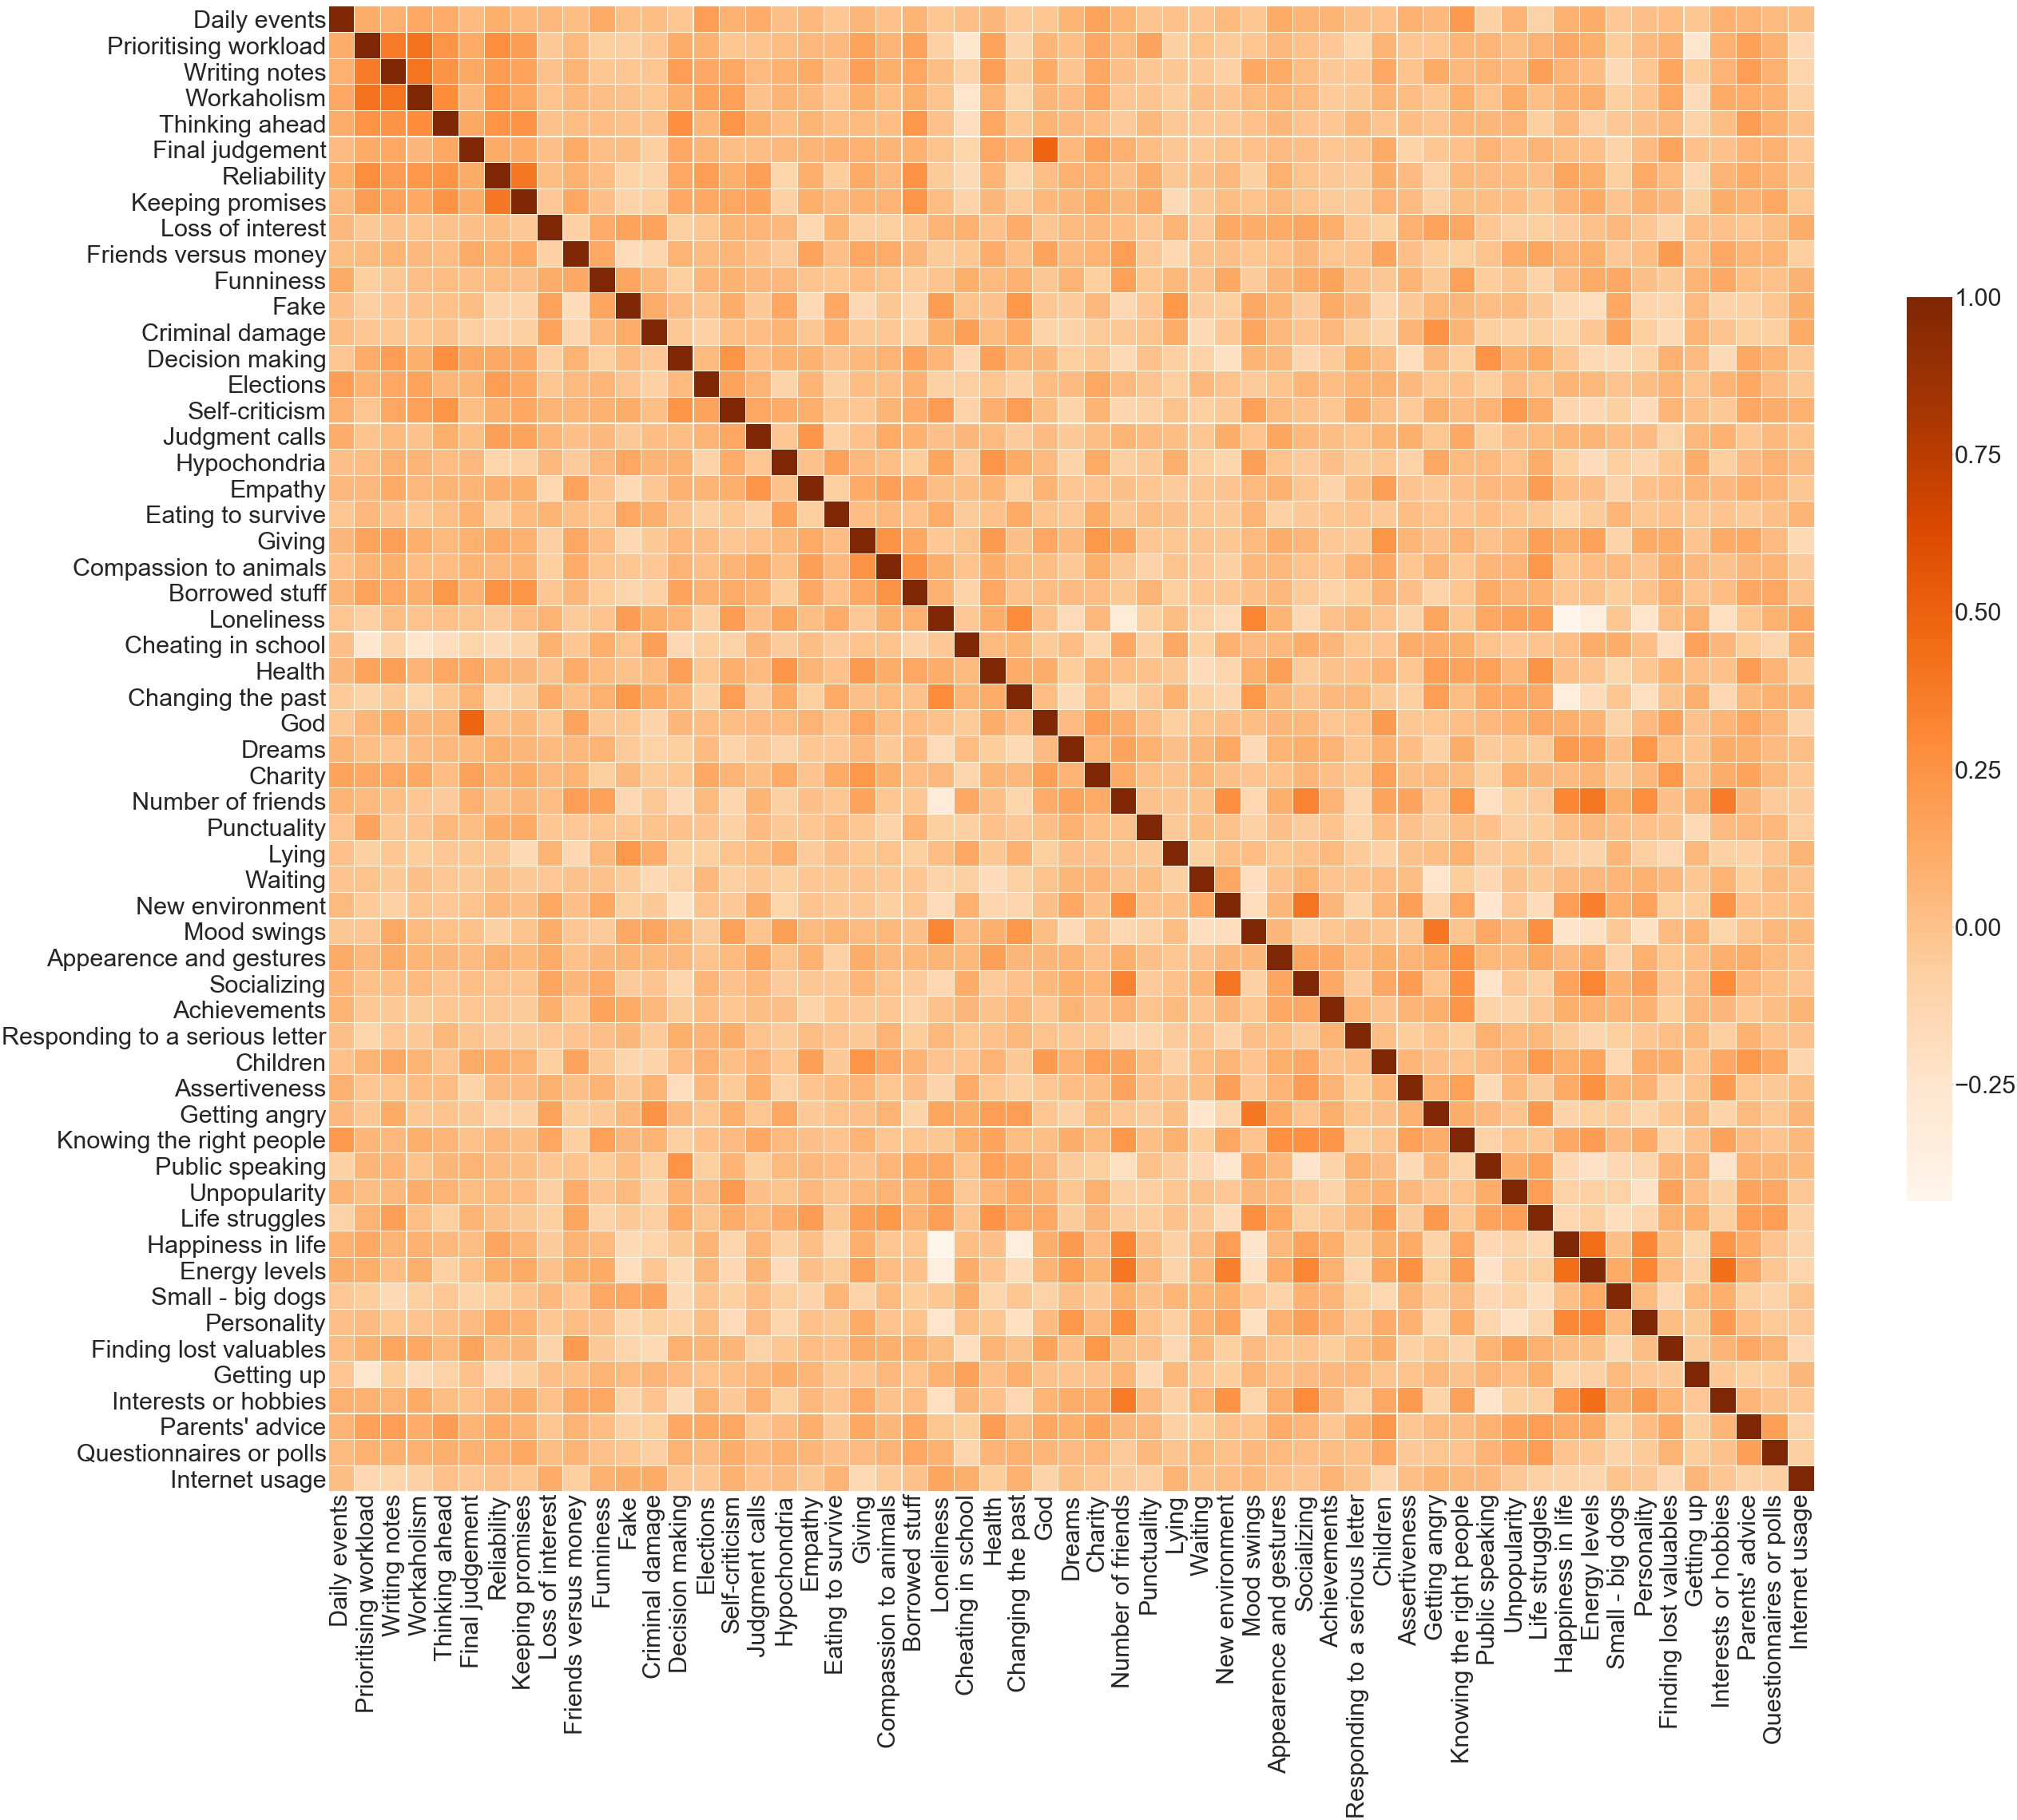

In [71]:
sns.heatmap(covariancePersonal,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [72]:
from sklearn.decomposition import PCA

n_components=37
p_list = ['pPersonal'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(personal)
personalPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.08206303 0.07294435 0.05215449 0.04595328 0.0369944  0.03662668
 0.02922116 0.02797873 0.02698499 0.02404178 0.0232336  0.02196821
 0.02118868 0.02010838 0.01990364 0.01959522 0.01863706 0.01820741
 0.0179292  0.01706496 0.01653956 0.01601233 0.01533952 0.0147829
 0.0144329  0.01413499 0.01382156 0.01330136 0.01303923 0.01282058
 0.01217937 0.01206438 0.01185796 0.01141264 0.01096801 0.01064699
 0.01054176]


array([ 8.21, 15.5 , 20.72, 25.32, 29.02, 32.68, 35.6 , 38.4 , 41.1 ,
       43.5 , 45.82, 48.02, 50.14, 52.15, 54.14, 56.1 , 57.96, 59.78,
       61.57, 63.28, 64.93, 66.53, 68.06, 69.54, 70.98, 72.39, 73.77,
       75.1 , 76.4 , 77.68, 78.9 , 80.11, 81.3 , 82.44, 83.54, 84.6 ,
       85.65])

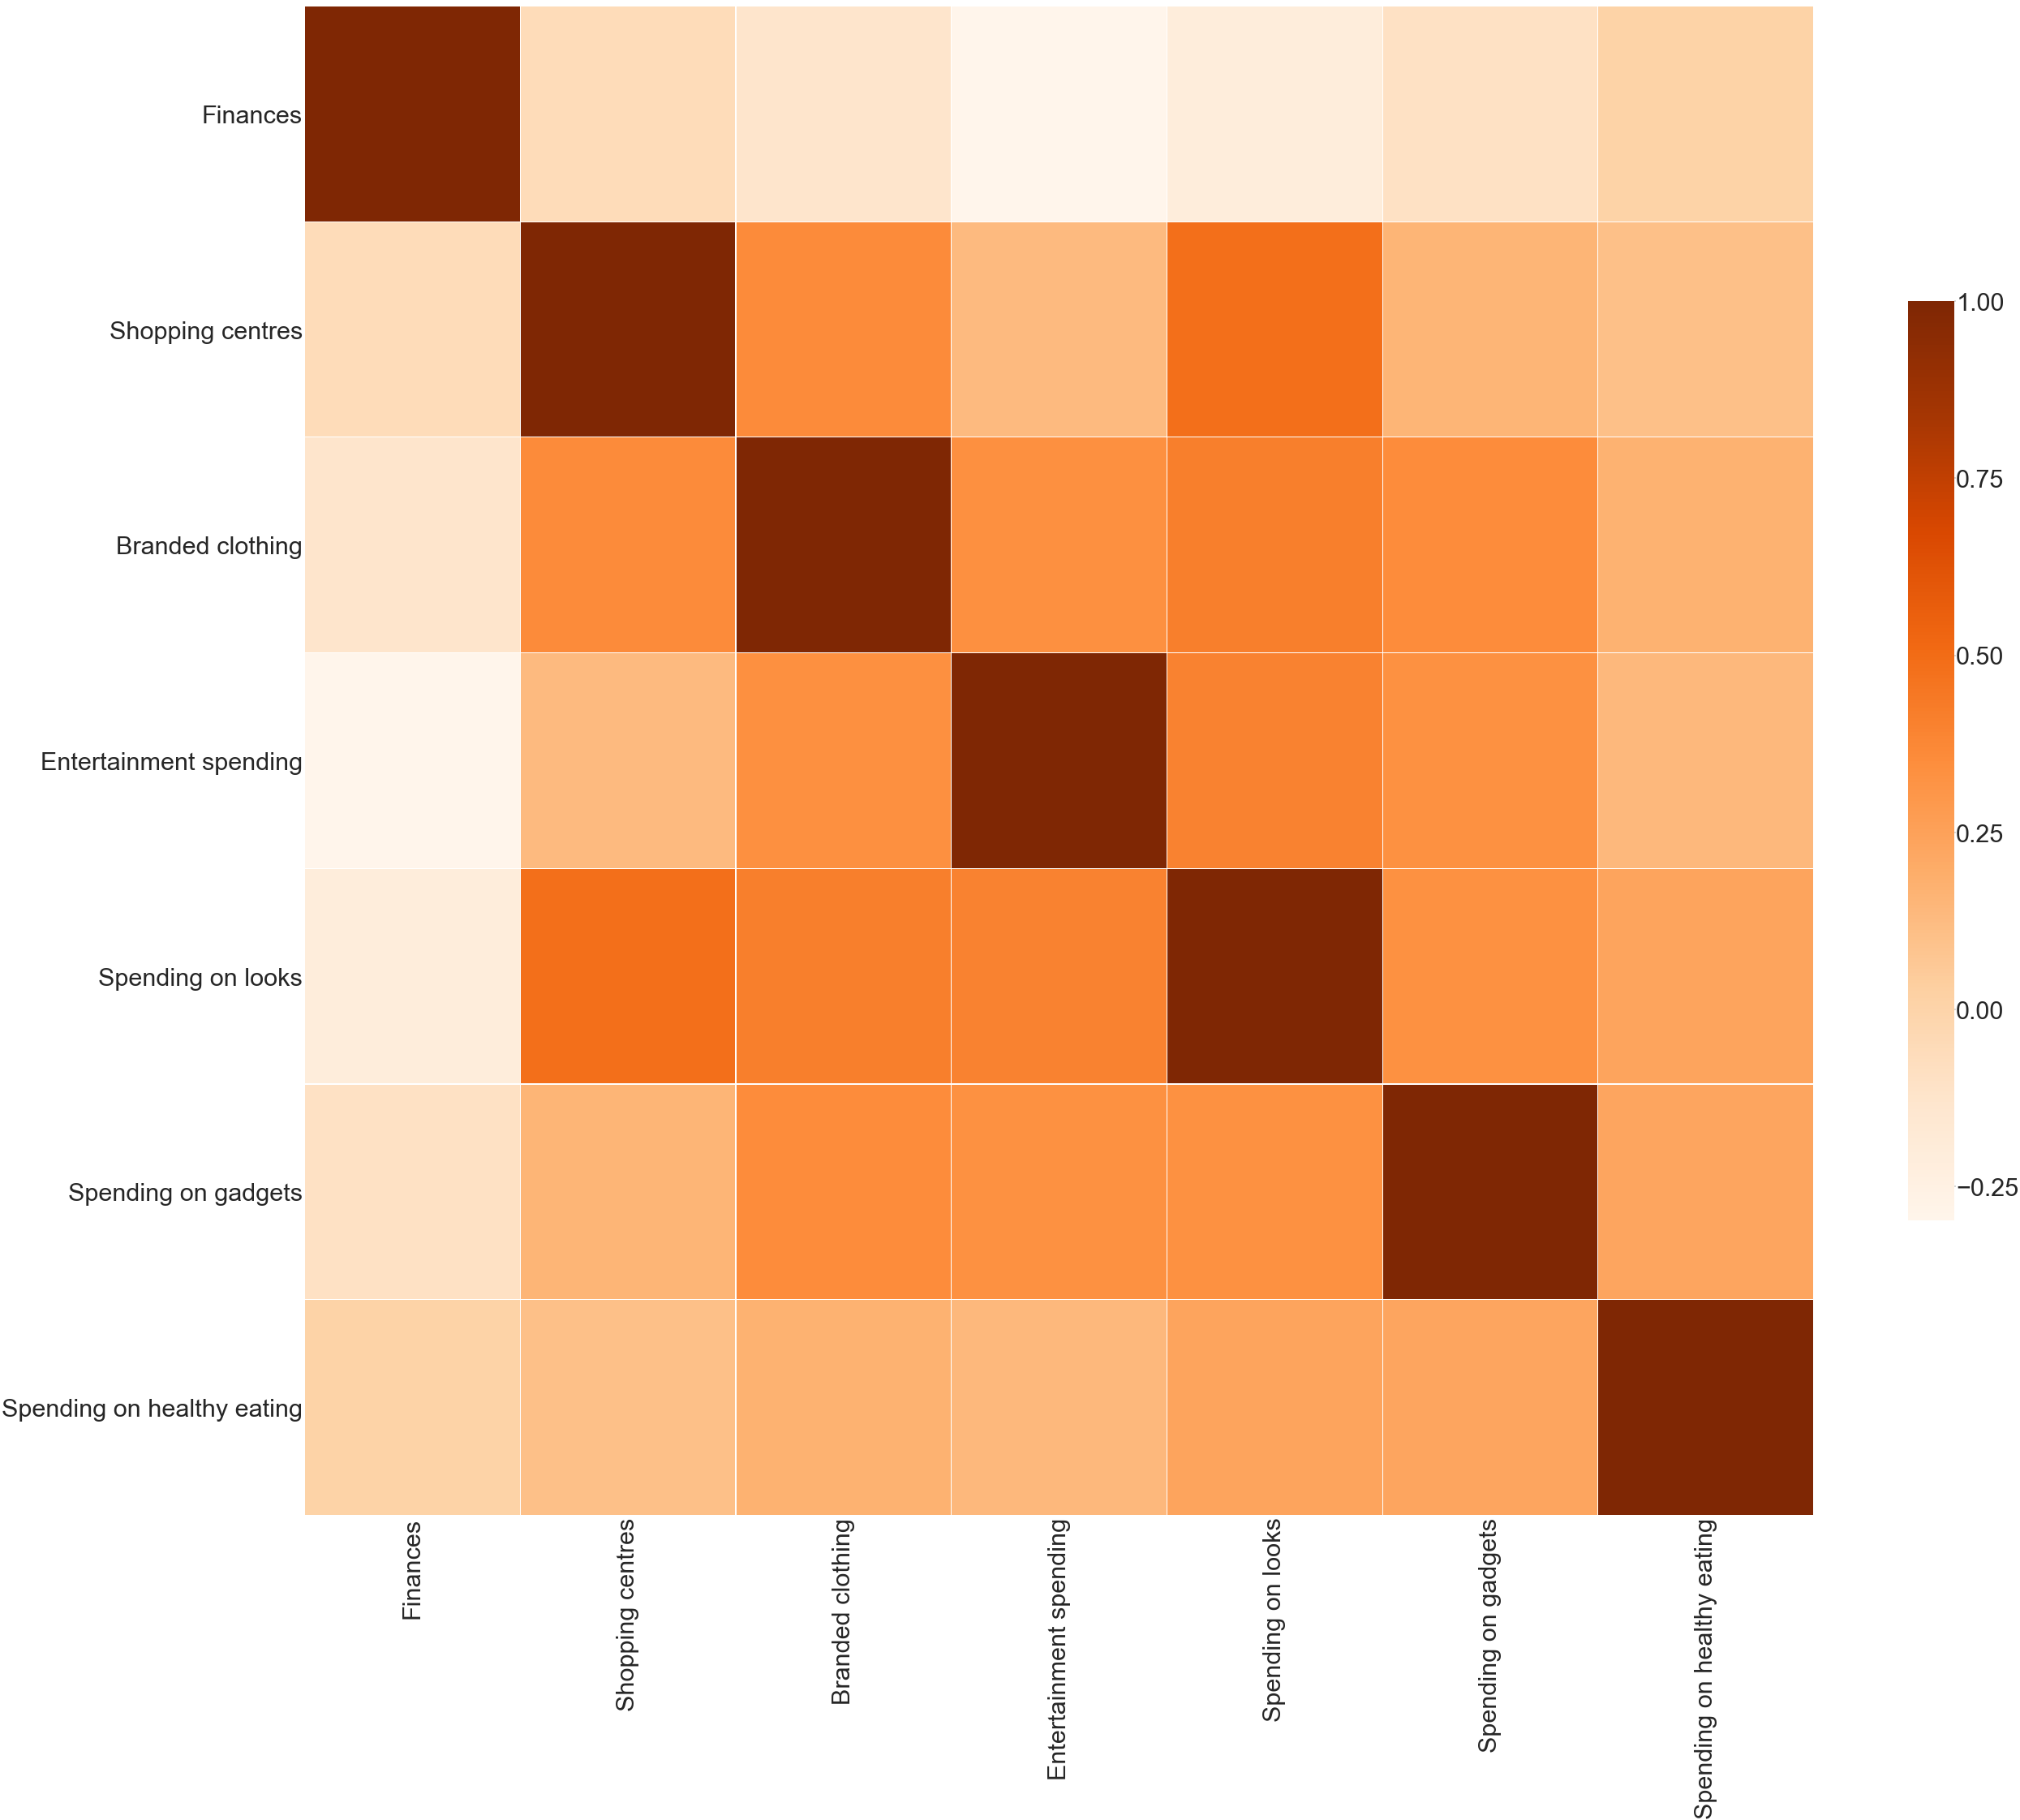

In [73]:
sns.heatmap(covarianceSpending,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [74]:
from sklearn.decomposition import PCA

n_components=4
p_list = ['pSpending'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(spending)
spendingPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.37506208 0.15587301 0.13344408 0.10187679]


array([37.51, 53.1 , 66.44, 76.63])

We can now merge the different PCA datasets and train the algorithms on this new dataset

In [75]:
dfPCAs = pd.concat([musicPCADf,moviesPCADf,fearsPCADf,interestsPCADf,personalPCADf,spendingPCADf,other],axis=1)
dfPCAs.head()

pMusic1   pMusic2   pMusic3   pMusic4   pMusic5   pMusic6   pMusic7  \
0 -2.842444 -2.792861  1.753981 -1.223504 -1.417295  1.666258  0.211064   
1  0.679753 -4.292841 -1.209960 -1.654391 -0.888797  1.290985  0.039077   
2  4.587140  0.234690  0.542032 -1.685587 -0.307783  1.087006 -0.269698   
3 -2.172347 -4.031344 -0.387422  0.337039  1.948958  0.879365 -0.617013   
4 -2.088324  2.544959  0.249527 -0.343544 -0.210339 -1.448256 -0.947882   

    pMusic8   pMusic9  pMusic10           ...             Age  Height  Weight  \
0  1.715249  1.706900 -0.350084           ...            20.0   163.0    48.0   
1 -0.387060 -1.206200  0.427577           ...            19.0   163.0    58.0   
2 -0.817274 -1.741301  1.155690           ...            20.0   176.0    67.0   
3  0.596128 -2.311057  0.383752           ...            22.0   172.0    59.0   
4  0.363593 -0.711676 -1.782964           ...            20.0   170.0    59.0   

   Number of siblings  Gender  Left - right handed  Education  Only child  \
0                 1.0     0.0                  0.0        3.0         0.0   
1                 2.0     0.0                  0.0        3.0         0.0   
2                 2.0     0.0                  0.0        2.0         0.0   
3                 1.0     0.0                  0.0        3.0         1.0   
4                 1.0     0.0                  0.0        2.0         0.0   

   Village - town  House - block of flats  
0             1.0                     0.0  
1             0.0                     0.0  
2             0.0                     0.0  
3             0.0                     1.0  
4             1.0                     1.0  

[5 rows x 102 columns]

This way we have reduced the dimension of the dataset from 150 to 101 columns, let's see how this impact performances

In [76]:
from sklearn.model_selection import train_test_split
X_trainPCAs, X_testPCAs, y_trainPCAs, y_testPCAs = train_test_split(dfPCAs, y, test_size=0.2,random_state = 67)
print(X_trainPCAs.shape, y_trainPCAs.shape)
print(X_testPCAs.shape, y_testPCAs.shape)

NameError: name 'y' is not defined

## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=29)  
classifier.fit(X_trainPCAs, y_trainPCAs)  

NameError: name 'X_trainPCAs' is not defined

In [55]:
y_pred = classifier.predict(X_testPCAs) 
classifier.score(X_testPCAs,y_testPCAs)

NameError: name 'X_testPCAs' is not defined

## XGBoost

In [578]:
model = xgb.XGBClassifier(n_estimators=200)
model.fit(X_trainPCAs, y_trainPCAs)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [579]:
model.score(X_testPCAs,y_testPCAs)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6831683168316832

## Random Forests

In [600]:
from sklearn.model_selection import cross_val_score
for n in [50,100,150,200]:
    for d in range(1,20):
        
        clf = RandomForestClassifier(n_estimators=n, max_depth=d,
                             random_state=0)
        scores = cross_val_score(clf, dfPCAs, y, cv=10)
        print(str(np.mean(scores))+", depth= "+str(d)+", n_estim= "+str(n))

0.6633663366336633, depth= 1, n_estim= 50
0.6633663366336633, depth= 2, n_estim= 50
0.6633663366336633, depth= 3, n_estim= 50
0.6712871287128712, depth= 4, n_estim= 50
0.6752475247524752, depth= 5, n_estim= 50
0.6653465346534653, depth= 6, n_estim= 50
0.6801980198019801, depth= 7, n_estim= 50
0.6673267326732673, depth= 8, n_estim= 50
0.6861386138613861, depth= 9, n_estim= 50
0.6752475247524752, depth= 10, n_estim= 50
0.6841584158415841, depth= 11, n_estim= 50
0.6792079207920791, depth= 12, n_estim= 50
0.69009900990099, depth= 13, n_estim= 50
0.6772277227722772, depth= 14, n_estim= 50
0.6792079207920791, depth= 15, n_estim= 50
0.6722772277227722, depth= 16, n_estim= 50
0.6801980198019801, depth= 17, n_estim= 50
0.6821782178217821, depth= 18, n_estim= 50
0.6782178217821782, depth= 19, n_estim= 50
0.6633663366336633, depth= 1, n_estim= 100
0.6633663366336633, depth= 2, n_estim= 100
0.6643564356435643, depth= 3, n_estim= 100
0.6673267326732673, depth= 4, n_estim= 100
0.6742574257425742, de

KeyboardInterrupt: 

In [601]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=150, max_depth=17,
                             random_state=0)
clf.fit(X_trainPCAs, y_trainPCAs)
clf.score(X_testPCAs,y_testPCAs)

0.7128712871287128

## Adaboost

In [603]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=11),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X_trainPCAs, y_trainPCAs)
print(bdt.score(X_testPCAs,y_testPCAs))
scores = cross_val_score(bdt,dfPCAs,y,cv=10)
scores

0.7277227722772277


array([0.65346535, 0.65346535, 0.68316832, 0.68316832, 0.69306931,
       0.66336634, 0.7029703 , 0.66336634, 0.71287129, 0.73267327])

In [605]:
summ=0.0
for i in scores:
    summ+=i
average = summ /len(scores)
average

0.6841584158415841

## RIDGE 

In [607]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=10).fit(X_trainPCAs, y_trainPCAs)
clf.score(X_testPCAs, y_testPCAs) 

0.7079207920792079

In [77]:
dataset['Empathy']

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
5       1.0
6       1.0
7       0.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      0.0
18      1.0
19      1.0
20      0.0
21      0.0
22      1.0
23      0.0
24      1.0
25      0.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
980     1.0
981     1.0
982     0.0
983     1.0
984     0.0
985     1.0
986     0.0
987     1.0
988     1.0
989     1.0
990     0.0
991     0.0
992     1.0
993     1.0
994     1.0
995     1.0
996     0.0
997     1.0
998     1.0
999     1.0
1000    0.0
1001    1.0
1002    0.0
1003    1.0
1004    1.0
1005    0.0
1006    0.0
1007    1.0
1008    1.0
1009    1.0
Name: Empathy, Length: 1010, dtype: float64

In [78]:
from sklearn.decomposition import PCA

n_components=40
p_list = ['p'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
z = dataset.drop('Empathy',1)
principalComponents = pca.fit_transform(z)
principalDf = pd.DataFrame(data = principalComponents, columns = p_list)

In [79]:
pca.explained_variance_ratio_

array([0.50212973, 0.08376743, 0.02558403, 0.02073347, 0.01917939,
       0.01661923, 0.01201899, 0.01073397, 0.00960711, 0.00873656,
       0.00781377, 0.007143  , 0.00687259, 0.0064811 , 0.00629202,
       0.00603553, 0.00558034, 0.00542621, 0.00504068, 0.00486481,
       0.0047798 , 0.00452723, 0.00449946, 0.00433498, 0.00425708,
       0.00412667, 0.00389677, 0.00376981, 0.0036535 , 0.00359022,
       0.00354698, 0.00349173, 0.00341706, 0.00334968, 0.00323593,
       0.003179  , 0.00306639, 0.00304832, 0.00298054, 0.00291083])

In [80]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([50.21, 58.59, 61.15, 63.22, 65.14, 66.8 , 68.  , 69.07, 70.03,
       70.9 , 71.68, 72.39, 73.08, 73.73, 74.36, 74.96, 75.52, 76.06,
       76.56, 77.05, 77.53, 77.98, 78.43, 78.86, 79.29, 79.7 , 80.09,
       80.47, 80.84, 81.2 , 81.55, 81.9 , 82.24, 82.57, 82.89, 83.21,
       83.52, 83.82, 84.12, 84.41])

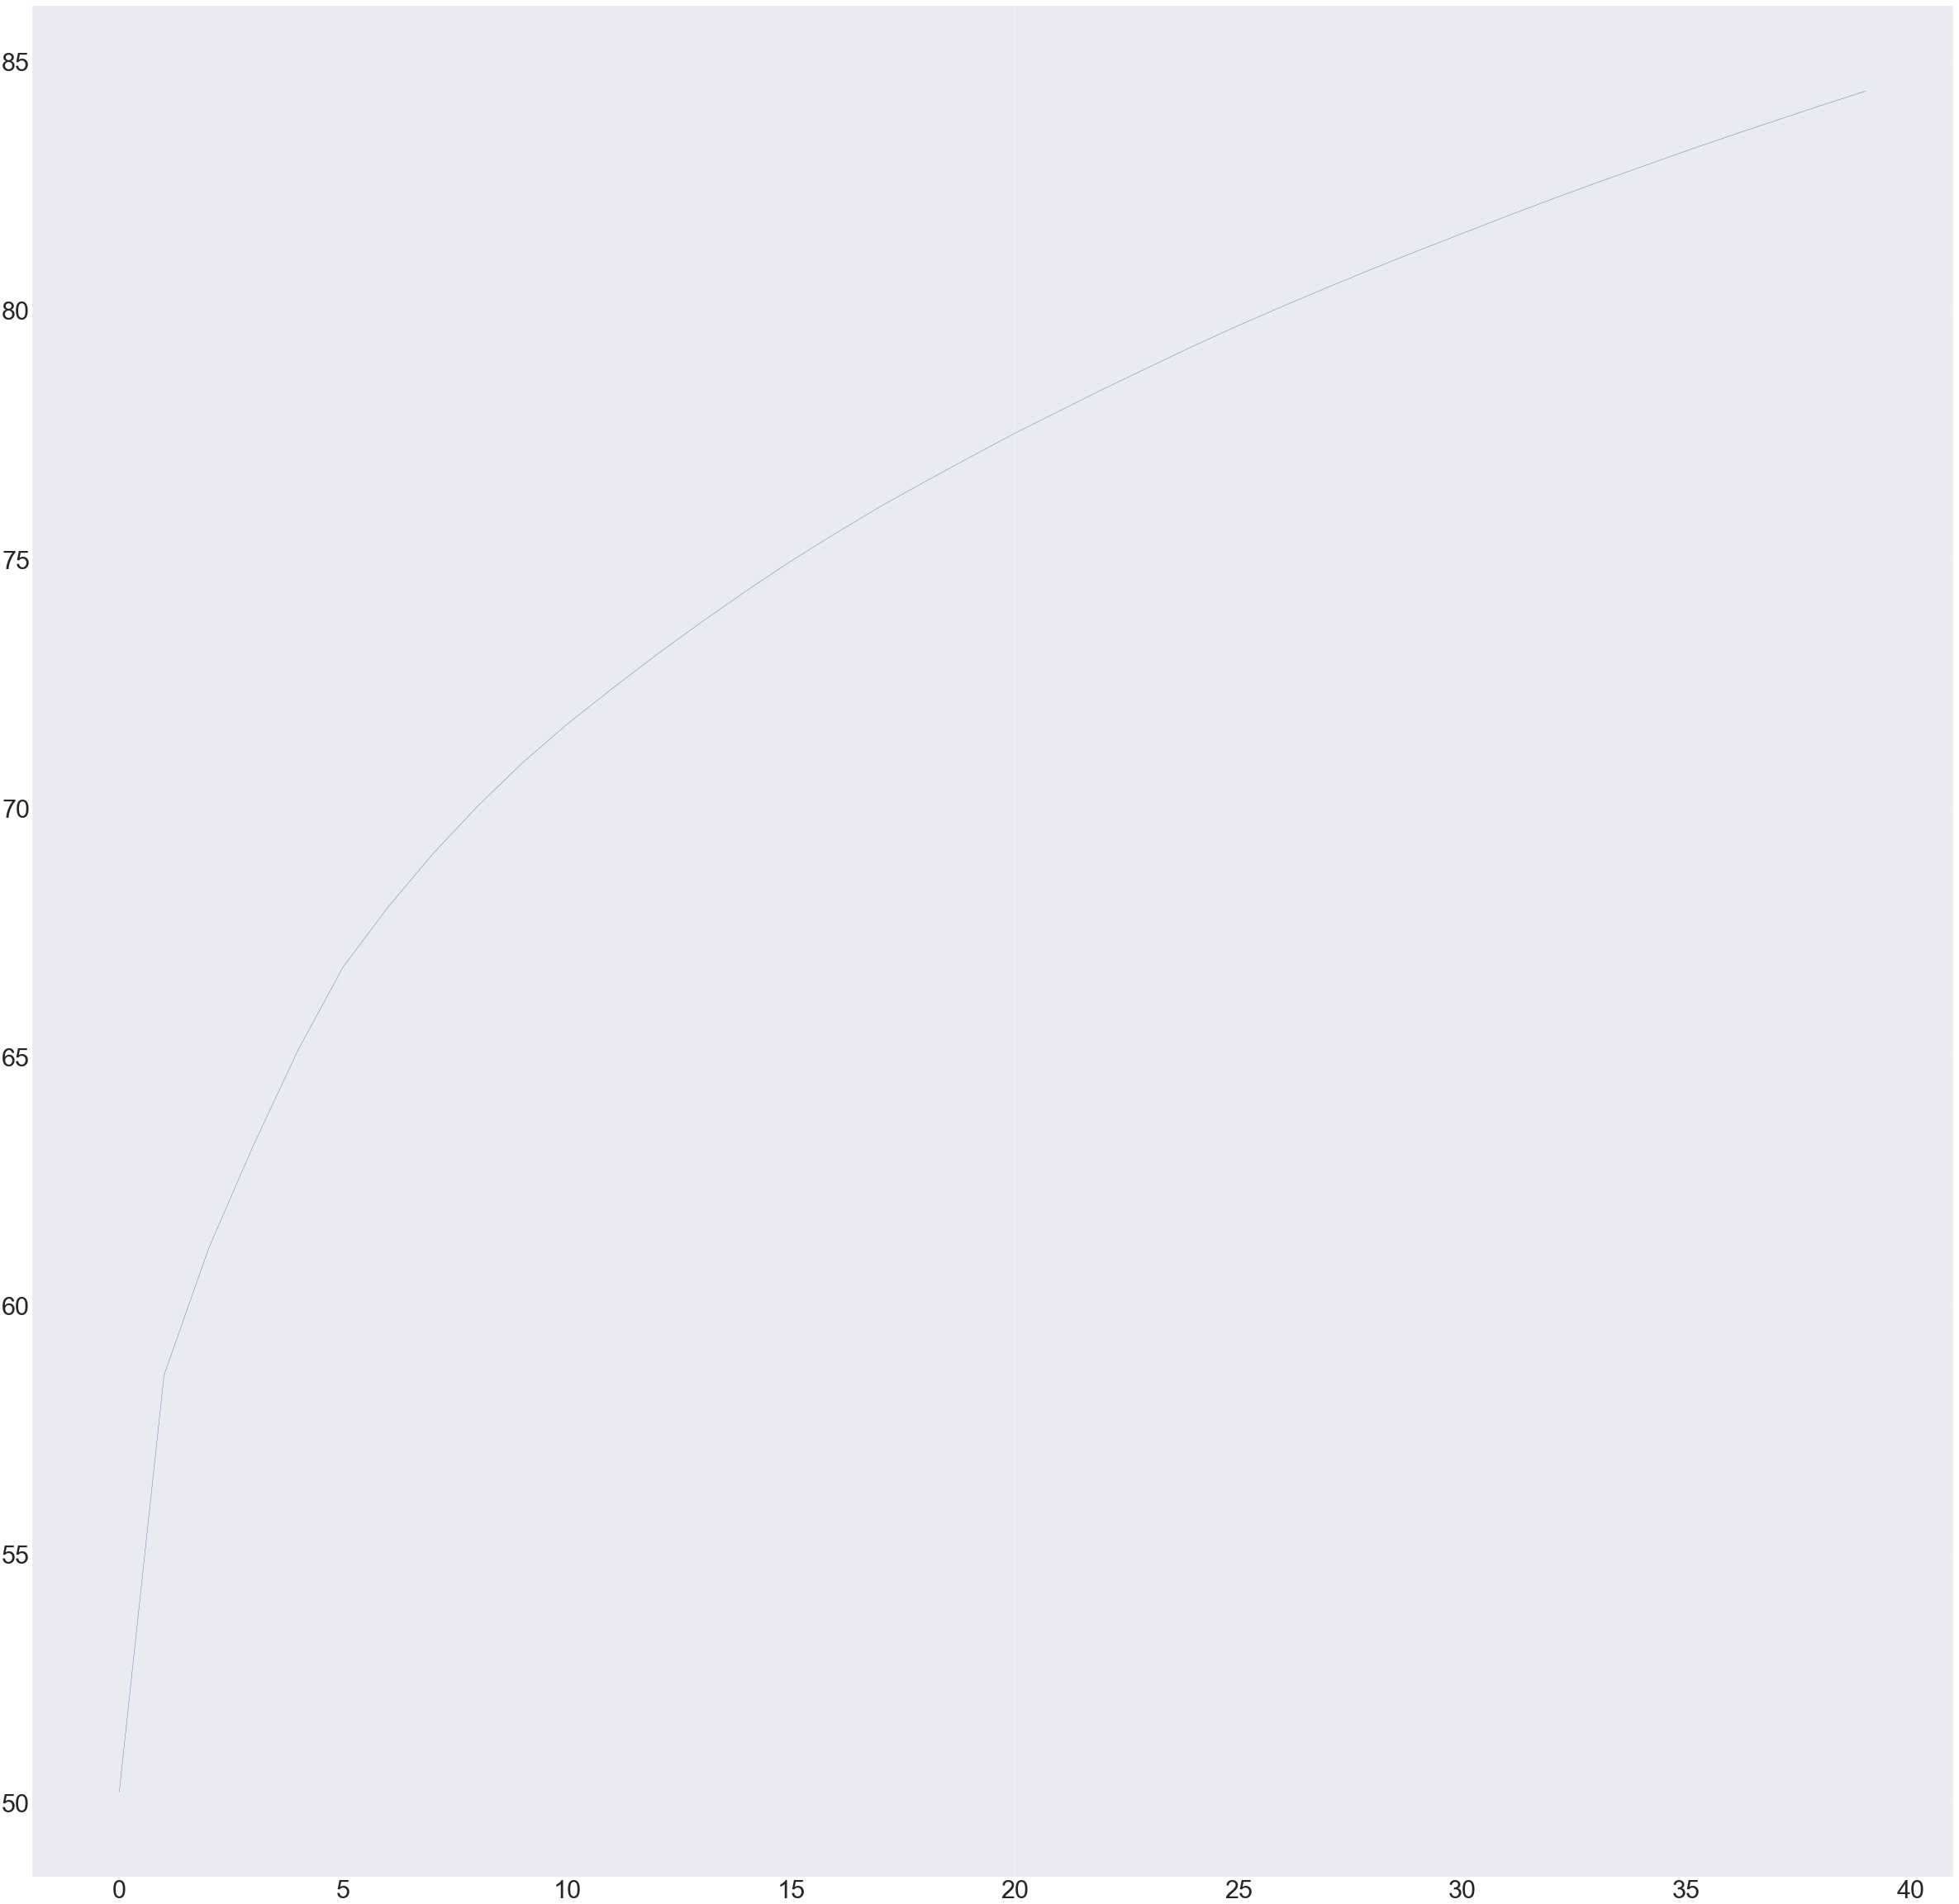

In [81]:
plt.plot(var1)

In [82]:
y = dataset.pop('Empathy') # define the target variable (dependent variable) as y
X = principalDf

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 67)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(808, 40) (808,)
(202, 40) (202,)


In [84]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, max_depth=11,
                             random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)  

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7029702970297029

In [85]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=29)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [86]:
y_pred = classifier.predict(X_test) 
classifier.score(X_test,y_test)

0.6732673267326733

As we can see, the information is very spreaded along different directions in fact, doing PCA, we can see that considering the first 6 features we reach a variance of about 65%, that is a quite low value, if we had see that with two or less components we could have above the 90 percent of the variance of the whole dataset we could have added the principal component to the dataset.
However, this result, confirms what we could have seen with the correlation analysis, the information in the dataset is very spreaded around all the features. 

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.2,random_state = 32)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(808, 149) (808,)
(202, 149) (202,)


In [88]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, max_depth=11,
                             random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)  

0.7128712871287128

Since we get almost the same accuracy, it seems better to keep the number of attributes the lowest possible. 
Let's try to perform PCA analysis. 

In [89]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=29)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [90]:
y_pred = classifier.predict(X_test)  
classifier.score(X_test,y_test)

0.693069306930693

In [95]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2,random_state = 32)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

(808, 149) (808,)
(202, 149) (202,)


AttributeError: module 'xgboost' has no attribute 'XGBClassifier'

In [361]:
model.score(X_test,y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6683168316831684

We can compare the performances of doing XGBoost with or without PCA, as we can see, with PCA performances are slightly better

In [96]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_trainPCA, X_testPCA, y_trainPCA, y_testPCA = train_test_split(X, y, test_size=0.2,random_state = 32)
print(X_trainPCA.shape, y_trainPCA.shape)
print(X_testPCA.shape, y_testPCA.shape)
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_trainPCA, y_trainPCA)

(808, 40) (808,)
(202, 40) (202,)


AttributeError: module 'xgboost' has no attribute 'XGBClassifier'

In [363]:
model.score(X_testPCA,y_testPCA)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6732673267326733

We can split the training set into training and dev set, making the latter 0.1 the size of the dataset and tune some Hyperparameters

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.15, random_state=1)
print(X_train.shape, y_train.shape)
print(X_dev.shape, y_dev.shape)

(686, 149) (686,)
(122, 149) (122,)


For example, we can try to tune the K for knn algorithm

In [98]:
from sklearn.neighbors import KNeighborsClassifier  
for k in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(X_train, y_train)  
    print("K = "+str(k)+" score= " + str(classifier.score(X_dev,y_dev)))  

K = 1 score= 0.6721311475409836
K = 2 score= 0.5573770491803278
K = 3 score= 0.6475409836065574
K = 4 score= 0.639344262295082
K = 5 score= 0.6639344262295082
K = 6 score= 0.6229508196721312
K = 7 score= 0.6475409836065574
K = 8 score= 0.639344262295082
K = 9 score= 0.6557377049180327
K = 10 score= 0.6557377049180327
K = 11 score= 0.6147540983606558
K = 12 score= 0.6229508196721312
K = 13 score= 0.6311475409836066
K = 14 score= 0.639344262295082
K = 15 score= 0.6639344262295082
K = 16 score= 0.6721311475409836
K = 17 score= 0.6721311475409836
K = 18 score= 0.6639344262295082
K = 19 score= 0.6639344262295082
K = 20 score= 0.6557377049180327
K = 21 score= 0.6639344262295082
K = 22 score= 0.6639344262295082
K = 23 score= 0.6721311475409836
K = 24 score= 0.6557377049180327
K = 25 score= 0.6721311475409836
K = 26 score= 0.6721311475409836
K = 27 score= 0.6885245901639344
K = 28 score= 0.6721311475409836
K = 29 score= 0.6885245901639344
K = 30 score= 0.6721311475409836
K = 31 score= 0.680327

Best k is k=31, now we can fit the model using the training set with this k and see what happens

In [99]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=31)  
classifier.fit(X_train, y_train) 
classifier.score(X_test,y_test)

0.7029702970297029

Now we can apply the same reasoning to the Random forests, to tune the max_depth and the n_estimators

In [100]:
from sklearn.ensemble import RandomForestClassifier

for n in [50,100,200,300,400]:
    for m in range(1,20):
        clf = RandomForestClassifier(n_estimators=n, max_depth=m,
                             random_state=0)
        clf.fit(X_train, y_train)
        print("max_depth = "+ str(m)+", n_estimators= "+str(n) + " acc= "+ str(clf.score(X_dev, y_dev)))

max_depth = 1, n_estimators= 50 acc= 0.6475409836065574
max_depth = 2, n_estimators= 50 acc= 0.6475409836065574
max_depth = 3, n_estimators= 50 acc= 0.6557377049180327
max_depth = 4, n_estimators= 50 acc= 0.6639344262295082
max_depth = 5, n_estimators= 50 acc= 0.6721311475409836
max_depth = 6, n_estimators= 50 acc= 0.6885245901639344
max_depth = 7, n_estimators= 50 acc= 0.6885245901639344
max_depth = 8, n_estimators= 50 acc= 0.6967213114754098
max_depth = 9, n_estimators= 50 acc= 0.7295081967213115
max_depth = 10, n_estimators= 50 acc= 0.6885245901639344
max_depth = 11, n_estimators= 50 acc= 0.7377049180327869
max_depth = 12, n_estimators= 50 acc= 0.7295081967213115
max_depth = 13, n_estimators= 50 acc= 0.7213114754098361
max_depth = 14, n_estimators= 50 acc= 0.7377049180327869
max_depth = 15, n_estimators= 50 acc= 0.7377049180327869
max_depth = 16, n_estimators= 50 acc= 0.7295081967213115
max_depth = 17, n_estimators= 50 acc= 0.7295081967213115
max_depth = 18, n_estimators= 50 acc= 0.

We can see that the best accuracy is obtained when we have max_depth=15 and n_estimators=50, let's see how we perform building the model on the training set

In [101]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_depth=15,
                             random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)  

0.7178217821782178

Still, we get an accuracy that is not the best available with our dataset, to prove that:

In [102]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, max_depth=12,
                             random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)  

0.7227722772277227

So still we can see how using a dev set for this problem is not the bast choice, considering the size of the dataset, what we get from tuning 
hyperparameters using the dev set are almost never the best parameters independently from the algorithm in question, so, instead of tuning the 
hyperparameters what we can do is not to waste data on the dev set and perform cross validation to get an average of our performances, 
making them independent from the random seed used for splitting the dataset. 
In this scenario, the tuning of the hyperparameters can be done by looking for the best average possible.

In [104]:
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.2,random_state = 32)
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=200, max_depth=11,
                             random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7128712871287128

In [105]:
clf.feature_importances_

array([0.00474499, 0.00446226, 0.00704397, 0.00611457, 0.00474943,
       0.00721871, 0.00468239, 0.00544771, 0.00662375, 0.00520785,
       0.0062418 , 0.00638231, 0.00535208, 0.00719048, 0.00879681,
       0.00688557, 0.01054515, 0.00656692, 0.004882  , 0.00344837,
       0.00518293, 0.00467858, 0.0056829 , 0.00603763, 0.00591388,
       0.00589873, 0.00953736, 0.00810932, 0.00596526, 0.00610252,
       0.00507732, 0.00665889, 0.01277009, 0.00615114, 0.00529911,
       0.00625293, 0.00481849, 0.007013  , 0.00590881, 0.00608957,
       0.00561625, 0.00751022, 0.00571933, 0.01192897, 0.00386988,
       0.00555197, 0.00793525, 0.00512123, 0.00617496, 0.00851939,
       0.00627575, 0.00464697, 0.00495515, 0.00677542, 0.00604909,
       0.00741896, 0.00575228, 0.00632667, 0.00724536, 0.0069492 ,
       0.00377989, 0.00690817, 0.00582762, 0.00513658, 0.00462846,
       0.00534289, 0.0059264 , 0.00683142, 0.00699043, 0.00575482,
       0.00598217, 0.00588869, 0.00572864, 0.00377146, 0.00404

I want to train a RandomForest classifier with the most important features given by the Random Forests on the whole dataset

In [106]:
mostImp=[]
for i in range(len(clf.feature_importances_)):
    if(clf.feature_importances_[i]>0.007):
        mostImp.append(i)
len(mostImp)

33

In [107]:
columns=[]
for i in mostImp:
    columns.append(dataset.iloc[:,i])
len(columns)

33

In [108]:
newDf = pd.DataFrame()
for i in range(len(columns)):
    newDf[i] = columns[i]
newDf.head()

0    1    2    3    4    5    6    7    8    9   ...    23   24   25   26  \
0  2.0  2.0  1.0  3.0  1.0  5.0  5.0  5.0  3.0  3.0  ...   4.0  1.0  4.0  5.0   
1  2.0  1.0  1.0  4.0  2.0  3.0  5.0  3.0  4.0  4.0  ...   3.0  2.0  2.0  2.0   
2  2.0  4.0  3.0  5.0  5.0  5.0  5.0  2.0  2.0  5.0  ...   2.0  2.0  3.0  4.0   
3  2.0  1.0  1.0  2.0  1.0  1.0  2.0  4.0  1.0  5.0  ...   5.0  3.0  3.0  2.0   
4  4.0  4.0  2.0  1.0  4.0  4.0  4.0  2.0  2.0  5.0  ...   4.0  4.0  3.0  5.0   

    27   28  29    30     31    32  
0  5.0  1.0   1  20.0  163.0  48.0  
1  4.0  1.0   5  19.0  163.0  58.0  
2  4.0  4.0   4  20.0  176.0  67.0  
3  3.0  3.0   4  22.0  172.0  59.0  
4  5.0  2.0   2  20.0  170.0  59.0  

[5 rows x 33 columns]

In [109]:
from sklearn.model_selection import train_test_split
X_trainRFbest, X_testRFbest, y_trainRFbest, y_testRFbest = train_test_split(newDf, y, test_size=0.2,random_state = 32)

In [110]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=200, max_depth=4,
                             random_state=0)
clf.fit(X_trainRFbest, y_trainRFbest)
scores = cross_val_score(clf, newDf, y, cv=10)
scores

array([0.68316832, 0.66336634, 0.72277228, 0.73267327, 0.7029703 ,
       0.65346535, 0.74257426, 0.68316832, 0.71287129, 0.76237624])

In [111]:
clf.score(X_trainRFbest,y_trainRFbest)

0.7797029702970297

In [112]:
summ=0.0
for i in scores:
    summ+=i
average = summ /len(scores)
average

0.7059405940594058

Let's see what happens if we do crossvalidation for random forest using the PCA dataset with the 40 most relevant dimensions

In [113]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=200, max_depth=11,
                             random_state=0)
clf.fit(X_trainPCA, y_trainPCA)
scores = cross_val_score(clf, principalDf, y, cv=10)
scores

array([0.69306931, 0.67326733, 0.69306931, 0.68316832, 0.67326733,
       0.66336634, 0.7029703 , 0.69306931, 0.75247525, 0.72277228])

In [114]:
summ=0.0
for i in scores:
    summ+=i
average = summ /len(scores)
average

0.695049504950495

Right now, the best result we get is an accuracy of 0.71 with Random Forests that should perform a little bit of feature selection by themselves, What we can do to try to improve this result is changing the algorithm.
Another two algorithms that can be useful are Adaboost that iteratively try to improve the classification and a Ridge classifier that perform feature selection by itself.

In [115]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X_train, y_train)
print(bdt.score(X_test,y_test))
scores = cross_val_score(bdt,dataset,y,cv=10)
scores

0.6683168316831684


array([0.68316832, 0.58415842, 0.65346535, 0.66336634, 0.67326733,
       0.67326733, 0.73267327, 0.66336634, 0.65346535, 0.67326733])

In [116]:
summ=0.0
for i in scores:
    summ+=i
average = summ /len(scores)
average

0.6653465346534653

In [118]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=10).fit(X_train, y_train)
clf.score(X_test, y_test) 

0.6831683168316832

In [120]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=50).fit_transform(dataset, y)
X_new.shape

(1010, 50)

In [121]:
X_trainChi2, X_testChi2, y_trainChi2, y_testChi2 = train_test_split(X_new, y, test_size=0.2,random_state = 32)

In [123]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=10).fit(X_trainChi2, y_trainChi2)
clf.score(X_testChi2, y_testChi2) 

0.6683168316831684

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
X_new2 = SelectKBest(f_classif, k=70).fit_transform(dataset, y)
X_new2.shape

(1010, 70)

In [125]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_new2, y, test_size=0.2,random_state = 32)

In [127]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=10).fit(X_trainf, y_trainf)
clf.score(X_testf, y_testf) 

0.6732673267326733

In [128]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=200, max_depth=4,
                             random_state=0)
clf.fit(X_trainf, y_trainf)
scores = cross_val_score(clf, X_new2, y, cv=10)
scores

array([0.69306931, 0.65346535, 0.7029703 , 0.72277228, 0.7029703 ,
       0.65346535, 0.72277228, 0.68316832, 0.68316832, 0.71287129])

In [129]:
summ=0.0
for i in scores:
    summ+=i
average = summ /len(scores)
average

0.6930693069306929

In [130]:
clf.score(X_trainf,y_trainf)

0.7797029702970297